In [1]:
from invisible_cities.database import load_db

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from sys import getsizeof

In [3]:
import sys

def get_size(obj, seen=None,):
    """Recursively finds size of objects"""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Important mark as seen *before* entering recursion to gracefully handle
    # self-referential objects
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_size(v, seen) for v in obj.values()])
        size += sum([get_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_size(i, seen) for i in obj])
    return size

In [4]:
from time import time as time
t0 = time()
nfiles = 100
noise_bound = 100
ns_per_sample = 25
window_min = 100
window_max = 500
nsipms = 1792
dwindow = 5

In [5]:
runno = '7487'
Ecut = (100, 600)
nwindow = int((window_min - window_max) / dwindow)

In [6]:
def gauss(x, A, m, s):
    return A*np.exp(-(x-m)**2 / (2*s**2))

def gauss2(x, A, m, v): 
    if v <= 0:
        return 1e10
    return A*np.exp(-(x-m)**2 / (2*v))

def offset_gauss(x, A, m, v, C):
    return C + A*np.exp(-(x-m)**2 / (2*v))

def const(x, a):
    return a + 0*x

from scipy.optimize import curve_fit

def exp_dt(sig):
    """
    expected drift distance  as a function of sigma of the S2 signal (Zrms from kdst 2018 version)
    parameters from the ad-hoc fit
    """
    p = [-10.00667732,  52.1855012,   12.68195726,  58.66322846, -20.11819297]
    dt = p[0] * sig**4 + p[1] * sig**3 + p[2]*sig**2 + p[3]*sig + p[4]
    return dt

In [7]:
# variable_window_7479_json_wsipms_20201207
jsondir = '/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/variable_window_'+runno+'_json_wsipms_20201207/'
# jsondir = '/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/variable_window_'+runno+'_json_updated_20201202/'

if nfiles > 0:
    all_jsons = [jsondir+file for file in os.listdir(jsondir)][:nfiles]
else:
    all_jsons = [jsondir+file for file in os.listdir(jsondir)]

In [8]:
all_jsons[0]

'/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/variable_window_7487_json_wsipms_20201207/irene_test_out_0000.json'

In [9]:
all_data = {
    'events_window_maxX' : [],
    'events_window_maxY' : [],
    'events_window_rms' : [],
    'events_window_width' : [],
    'events_window_energy' : [],
    'events_window_charge' : [],
    'events_window_Zrms' : [],
    'events_window_Zgauss' : [],
    'events_window_Wrms' : [],
    'events_window_Wgauss' : [],
    'events_window_GaussOffset' : [],
    'events_prewindow_sums' : [],
    'events_sumwf' : [],
    'events_times' : [],
    'event_numbers' : [],
    'events_window_r2' : []
}

n = 0
for filename in all_jsons:
    if n % 10 == 0:
        remaining = (len(all_jsons) - n)*(time() - t0) / (n + 1)
        print(n, '...', round(time() - t0, 1), '; Remaining ~=', round(remaining,1))
    n += 1
    f = open(filename)
    new_dict = json.load(f)
    f.close()
    for k in new_dict.keys():
        if k in all_data.keys():
            all_data[k].extend(new_dict[k])
        else:
            print('I SEE A NEW PARAMETER', k)
            all_data[k] = new_dict[k]
print('DONE')

0 ... 121.7 ; Remaining ~= 12172.1
I SEE A NEW PARAMETER events_X_sipm_subtracted
I SEE A NEW PARAMETER events_Y_sipm_subtracted
I SEE A NEW PARAMETER events_prewindow_sum_sipms
I SEE A NEW PARAMETER events_sum_sipms
I SEE A NEW PARAMETER events_sum_sipms_subtracted
I SEE A NEW PARAMETER events_maxsipm_subtracted
10 ... 133.0 ; Remaining ~= 1088.0
20 ... 146.3 ; Remaining ~= 557.2
30 ... 158.4 ; Remaining ~= 357.7
40 ... 187.6 ; Remaining ~= 274.5
50 ... 203.9 ; Remaining ~= 199.9
60 ... 244.1 ; Remaining ~= 160.0
70 ... 297.3 ; Remaining ~= 125.6
80 ... 309.2 ; Remaining ~= 76.4
90 ... 322.4 ; Remaining ~= 35.4
DONE


In [10]:
print('Checking size of data...')
for k in all_data.keys():
    print('Size of', k, '=', get_size(all_data[k])/1000000, 'MB')

Checking size of data...
Size of events_window_maxX = 89.9396 MB
Size of events_window_maxY = 89.9396 MB
Size of events_window_rms = 89.45684 MB
Size of events_window_width = 89.65076 MB
Size of events_window_energy = 89.9396 MB
Size of events_window_charge = 89.9396 MB
Size of events_window_Zrms = 89.9396 MB
Size of events_window_Zgauss = 89.562156 MB
Size of events_window_Wrms = 89.9396 MB
Size of events_window_Wgauss = 89.562156 MB
Size of events_window_GaussOffset = 89.562152 MB
Size of events_prewindow_sums = 1.079568 MB
Size of events_sumwf = 31.64536 MB
Size of events_times = 31.64536 MB
Size of event_numbers = 0.528156 MB
Size of events_window_r2 = 89.562152 MB
Size of events_X_sipm_subtracted = 1.079568 MB
Size of events_Y_sipm_subtracted = 1.079568 MB
Size of events_prewindow_sum_sipms = 1919.0196 MB
Size of events_sum_sipms = 1919.0196 MB
Size of events_sum_sipms_subtracted = 1919.0196 MB
Size of events_maxsipm_subtracted = 1.101008 MB


In [11]:
events_window_maxX = np.array(all_data['events_window_maxX'])
events_window_maxY = np.array(all_data['events_window_maxY'])
events_window_rms = np.array(all_data['events_window_rms'])
events_window_width = np.array(all_data['events_window_maxX'])
events_window_energy = np.array(all_data['events_window_energy'])
events_window_charge = np.array(all_data['events_window_charge'])
events_window_Zrms = np.array(all_data['events_window_Zrms'])
events_window_Zgauss = np.array(all_data['events_window_Zgauss'])
events_sumwf = np.array(all_data['events_sumwf'])
events_times = np.array(all_data['events_times'])
events_window_Wrms = np.array(all_data['events_window_Wrms'])
events_window_Wgauss = np.array(all_data['events_window_Wgauss'])
events_window_r2 = np.array(all_data['events_window_r2'])
events_window_GaussOffset = np.array(all_data['events_window_GaussOffset'])
events_prewindow_sums = np.array(all_data['events_prewindow_sums'])

events_X_sipm_subtracted = np.array(np.array(all_data['events_X_sipm_subtracted']))
events_Y_sipm_subtracted = np.array(np.array(all_data['events_Y_sipm_subtracted']))
events_prewindow_sum_sipms = np.array(np.array(all_data['events_prewindow_sum_sipms']))
events_sum_sipms = np.array(np.array(all_data['events_sum_sipms']))
events_sum_sipms_subtracted = np.array(np.array(all_data['events_sum_sipms_subtracted']))
events_maxsipm_subtracted = np.array(np.array(all_data['events_maxsipm_subtracted']))

In [12]:
del all_data

In [14]:
print(len(events_window_maxX))
print(len(events_window_maxY))
print(len(events_window_rms))
print(len(events_window_width))
print(len(events_window_energy))
print(len(events_window_charge))
print(len(events_window_Zrms))
print(len(events_sumwf))
print(len(events_times))
print(len(events_window_Wrms))
print(len(events_window_Wgauss))
print(len(events_window_GaussOffset))
print(len(events_prewindow_sums))

print('-------------')
print(len(events_window_maxX[0]))
print(len(events_window_maxY[0]))
print(len(events_window_rms[0]))
print(len(events_window_width[0]))
print(len(events_window_energy[0]))
print(len(events_window_charge[0]))
print(len(events_window_Zrms[0]))
print(len(events_sumwf[0]))
print(len(events_times[0]))

33256
33256
33256
33256
33256
33256
33256
33256
33256
33256
33256
33256
33256
-------------
80
80
80
80
80
80
80
26
26


In [15]:
last_GaussOffset = np.array([ window_GaussOffset[-1] for window_GaussOffset in events_window_GaussOffset ])

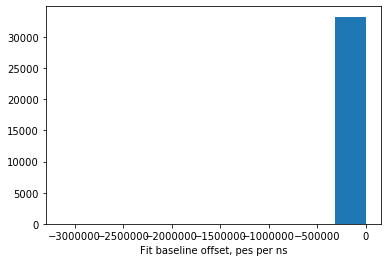

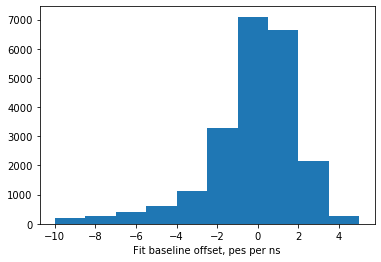

In [16]:
plt.hist(last_GaussOffset)
plt.xlabel('Fit baseline offset, pes per ns')
plt.show()

plt.hist(last_GaussOffset, range=(-10, 5))
plt.xlabel('Fit baseline offset, pes per ns')
plt.show()

In [17]:
max(events_prewindow_sums)

2887.019572795253

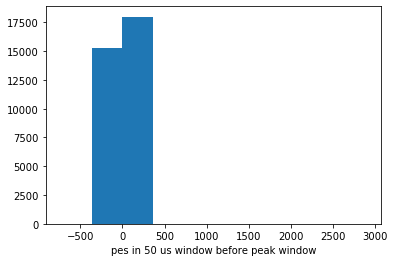

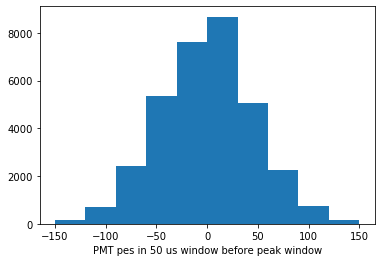

In [18]:
plt.hist(events_prewindow_sums)
plt.xlabel('pes in 50 us window before peak window')
plt.show()

plt.hist(events_prewindow_sums, range=(-150,150))
plt.xlabel('PMT pes in 50 us window before peak window')
plt.show()

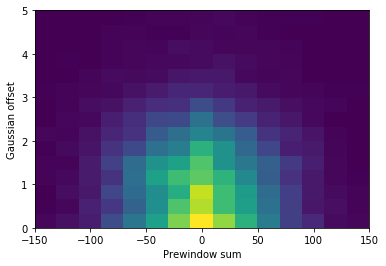

In [19]:
GoodFits = (last_GaussOffset > -1) & (last_GaussOffset < 10)
plt.hist2d(events_prewindow_sums[GoodFits], last_GaussOffset[GoodFits], bins = 15, range = ((-150, 150),(0, 5)))
plt.xlabel('Prewindow sum')
plt.xlim(-150, 150)
plt.ylabel('Gaussian offset')
plt.show()

In [20]:
events_energy = np.array([ events_window_energy[e][-1] for e in range(len(events_window_energy)) ])
events_energy_subtracted = events_energy - events_prewindow_sums
events_window_cut_samples = np.arange(window_min, window_max, dwindow)
events_window_cut = events_window_cut_samples * ns_per_sample * 2
events_window_energy_norm = np.array([ [ peak / max(max(window_energy), 0.1) for peak in window_energy ] for window_energy in events_window_energy ])
events_peaks = np.array([ max(wf) for wf in events_sumwf ])
Emask = (events_energy > Ecut[0]) & (events_energy < Ecut[1])

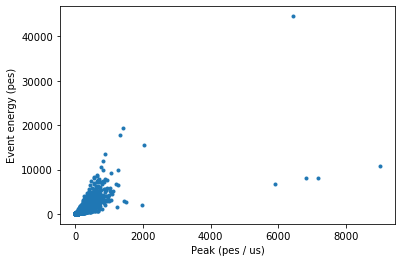

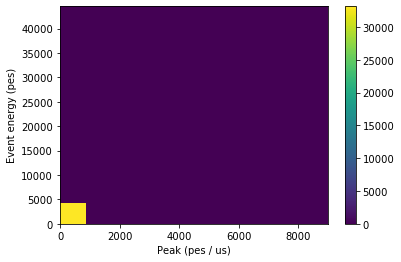

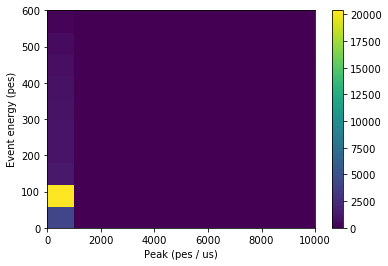

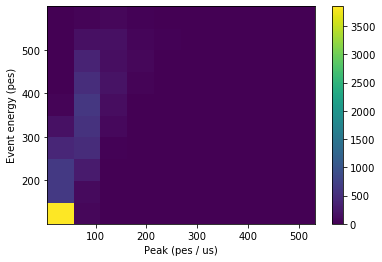

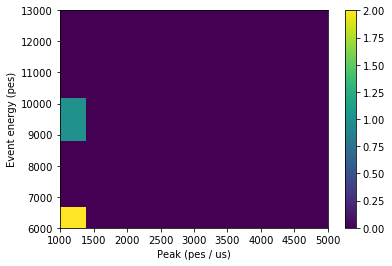

In [21]:
plt.plot(events_peaks, events_energy, '.')
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.show()

h = plt.hist2d(events_peaks, events_energy)
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

h = plt.hist2d(events_peaks, events_energy, range = ((0,10000),(0, Ecut[1])) )
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

h = plt.hist2d(events_peaks[Emask], events_energy[Emask])
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

h = plt.hist2d(events_peaks, events_energy, range = ((1000,5000),(6000, 13000)) )
plt.xlabel('Peak (pes / us)')
plt.ylabel('Event energy (pes)')
plt.colorbar(h[3])
plt.show()

Zgauss = -105673.05541833742
Energy = 103.1937640463993


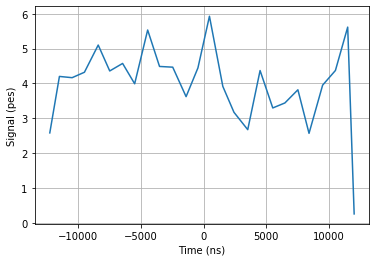

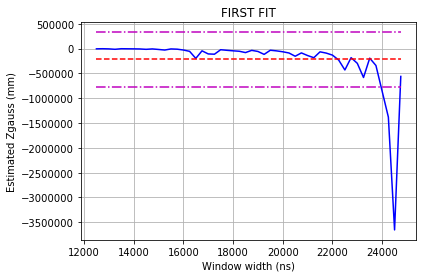

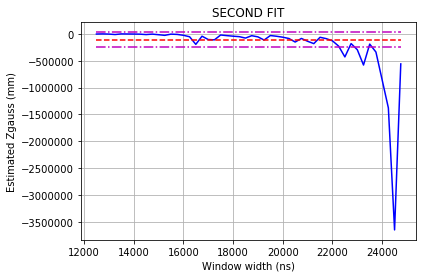

Zgauss = -28732.545511220273
Energy = 105.91567096518516


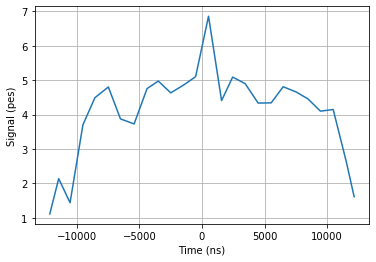

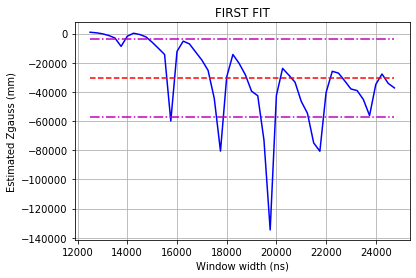

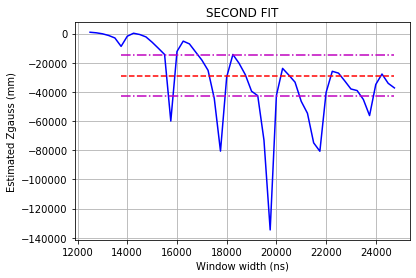

Zgauss = -43807.183276524906
Energy = 105.13265302682989


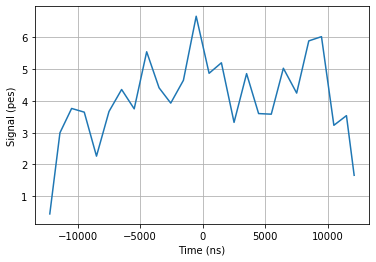

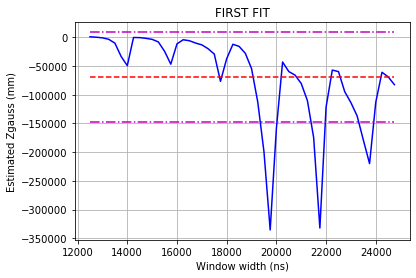

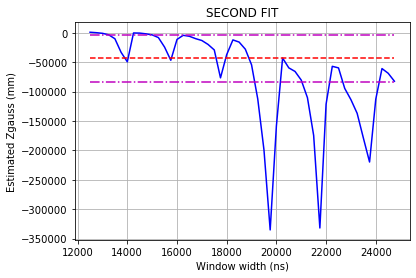

Zgauss = -116579.18990306802
Energy = 106.68277930112889


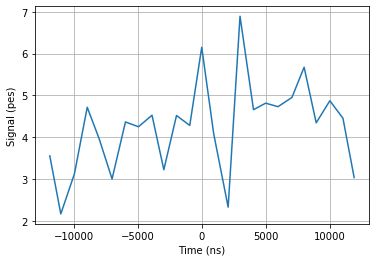

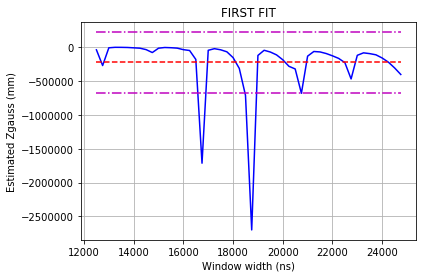

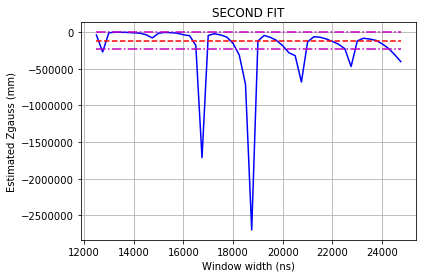

Zgauss = -6493.442434904227
Energy = 120.96484846345103


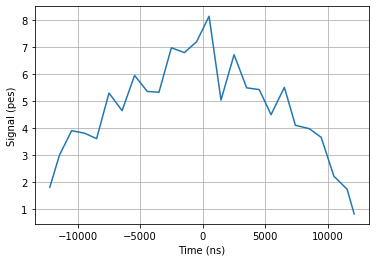

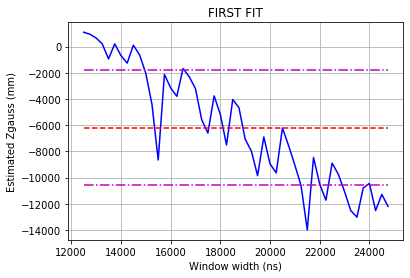

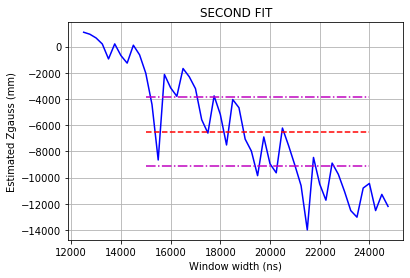

Zgauss = -7100.430921142289
Energy = 101.32087390556948


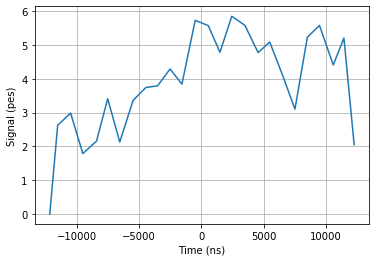

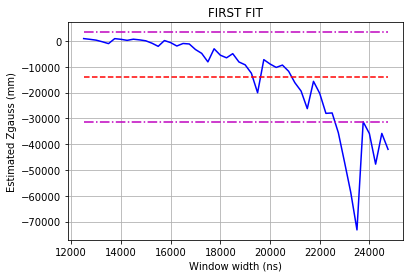

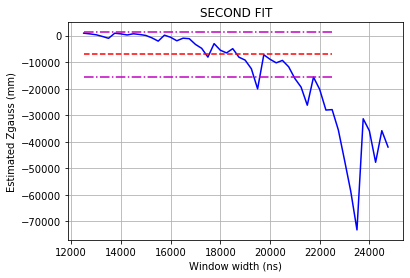

Zgauss = 86.2229876511705
Energy = 216.34532888367877


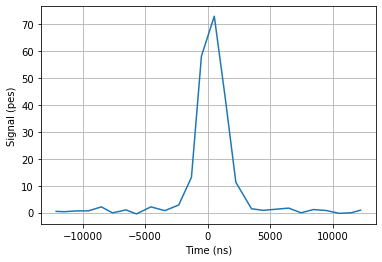

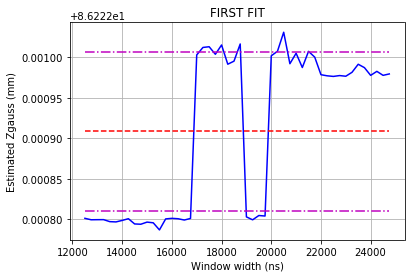

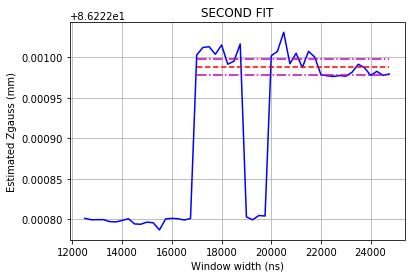

Zgauss = 390.7576805822942
Energy = 277.9888558038554


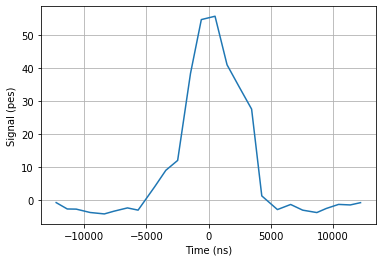

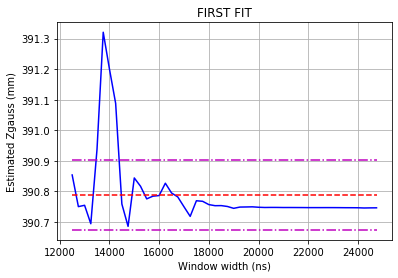

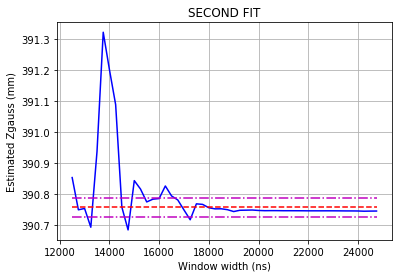

Zgauss = -16471.671593135492
Energy = 113.44484989528482


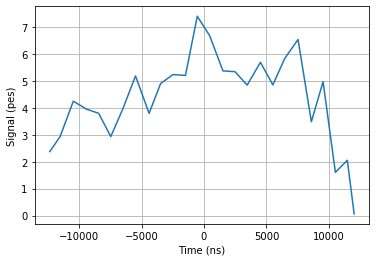

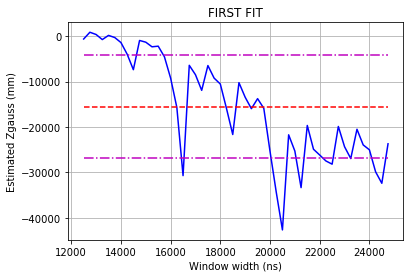

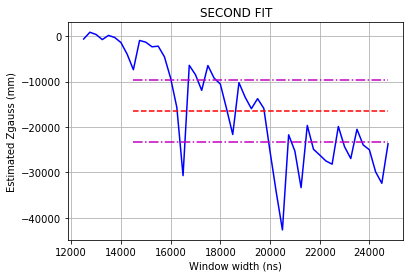

Zgauss = -47273.150656749036
Energy = 113.1781029958471


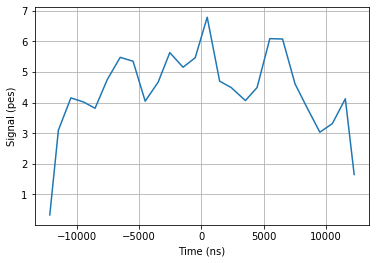

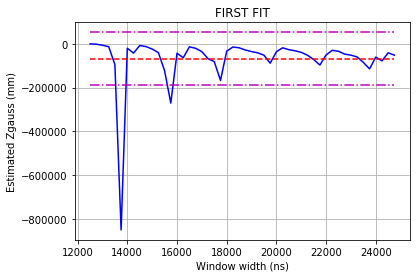

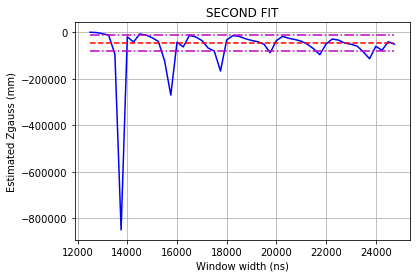

Zgauss = 358.7295002359913
Energy = 395.006772325486


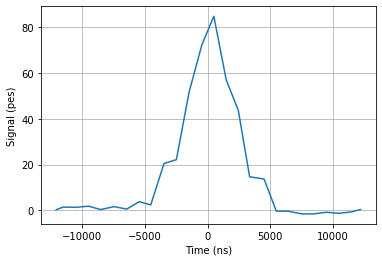

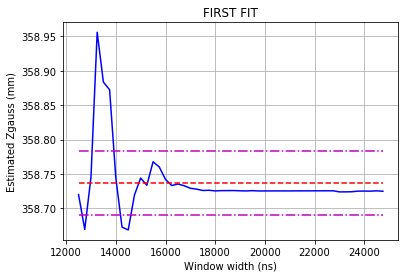

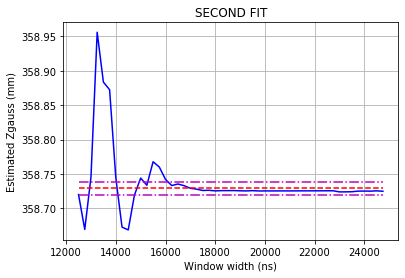

Zgauss = -20.118192552765006
Energy = 103.34563581176747


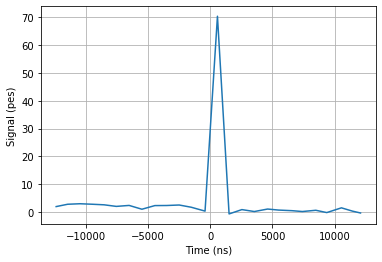

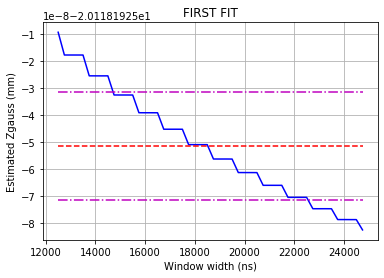

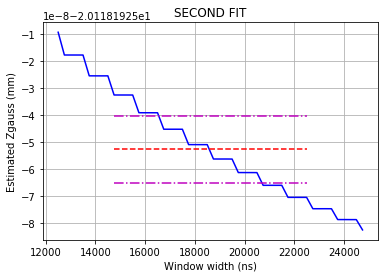

Zgauss = 24.113075168132223
Energy = 285.6735728839805


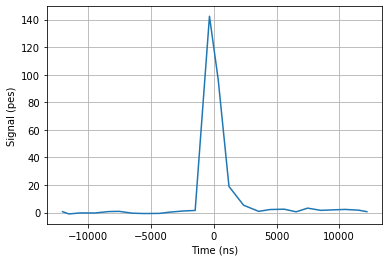

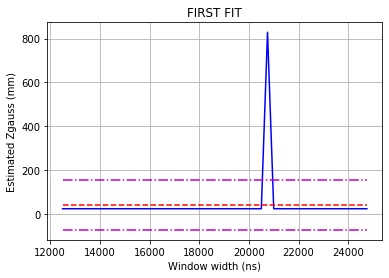

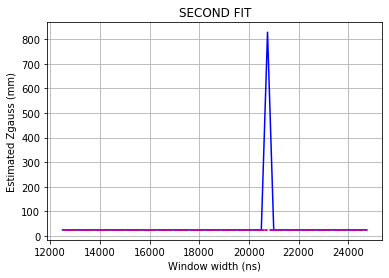

Zgauss = -16786.23267886704
Energy = 110.37901757761345


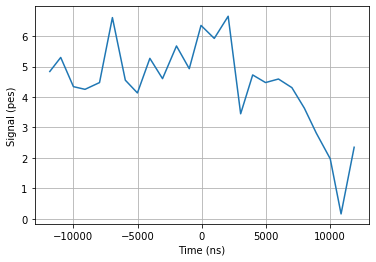

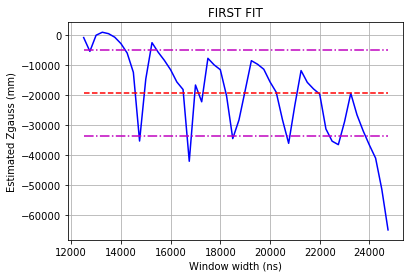

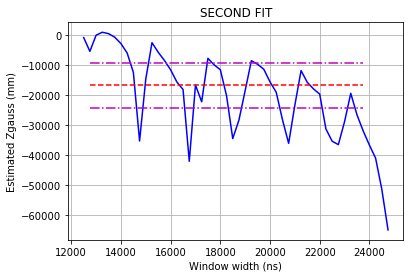

Zgauss = 400.19737403116153
Energy = 365.17235306811403


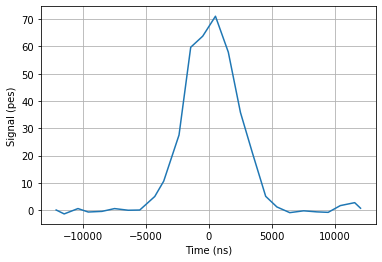

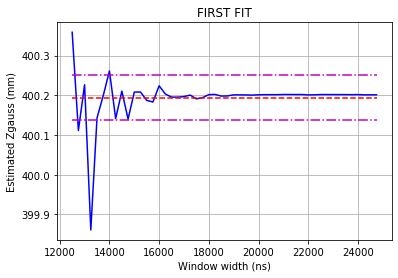

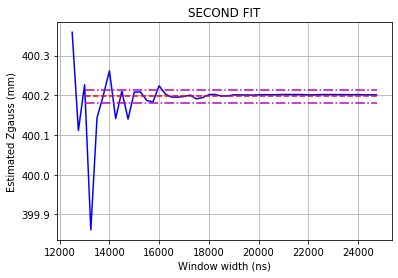

Zgauss = -24666.095299403307
Energy = 104.21022742947383


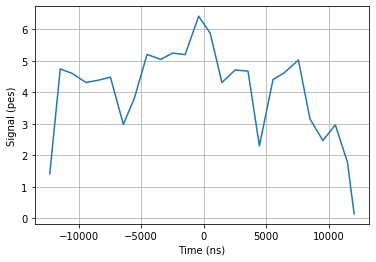

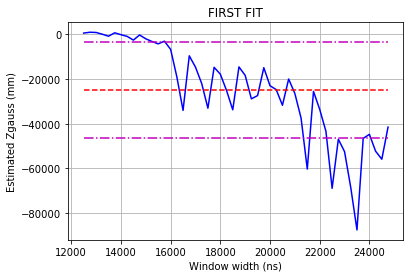

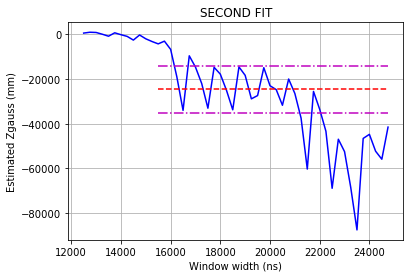

Zgauss = 371.0734365562856
Energy = 206.46782743556514


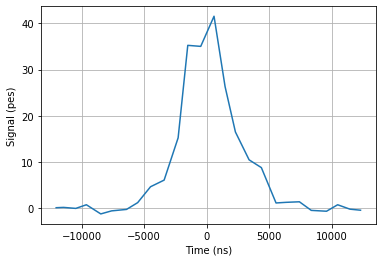

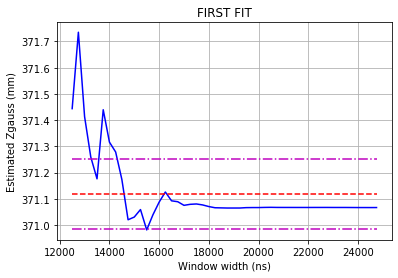

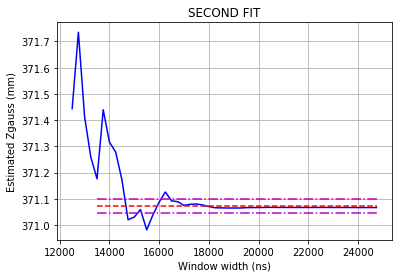

Zgauss = -6989.455596859549
Energy = 125.9123064608333


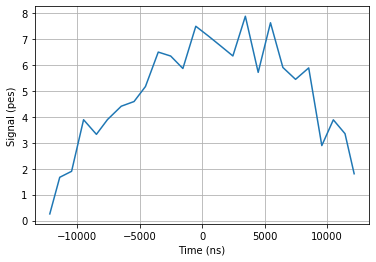

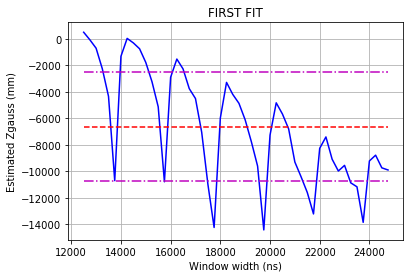

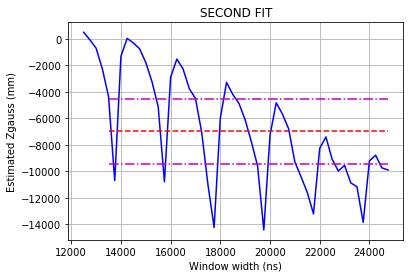

Zgauss = -5336.729608966848
Energy = 103.5211883043986


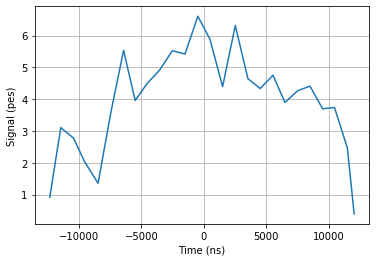

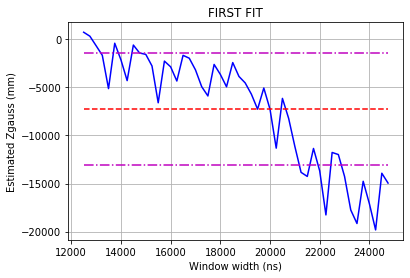

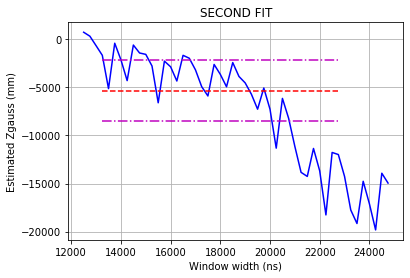

Zgauss = 138.44118263469971
Energy = 546.7464499185419


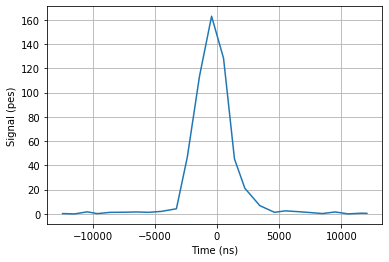

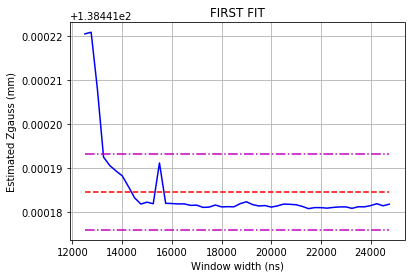

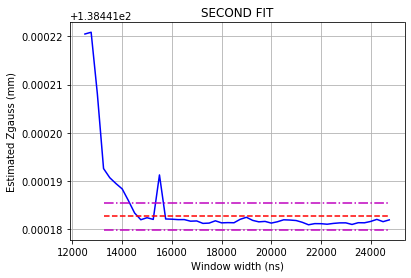

Nasty events:  []


In [22]:
# Get the Zgauss values by finding the flat line in the Zgauss vs window
all_Zgauss = []
nasty_events = []

maxshow = 20
shown = 0
for ievt in range(len(events_window_Zgauss)):    
    
    step = 0
    nasty = False
    
    try:

        # First iteration of fit
        long_window_cut = events_window_cut > events_window_cut[-1] / 2
        xdata = events_window_cut[long_window_cut]
        ydata = events_window_Zgauss[ievt][long_window_cut]
        popt, pcov = curve_fit(const, xdata, ydata, p0 = np.mean(ydata))

        step = 1
        fitdata = const(xdata, *popt)
        stdev = np.std(ydata)
        errors = (fitdata - stdev, fitdata + stdev)

        stdev_mask = (ydata > errors[0]) & (ydata < errors[1])

        # Second iteration of fit, without outliers
        step = 2
        xdata2 = xdata[stdev_mask]
        ydata2 = ydata[stdev_mask]
        popt, pcov = curve_fit(const, xdata2, ydata2, p0 = np.mean(ydata))

        step = 3
        fitdata2 = const(xdata2, *popt)
        stdev2 = np.std(ydata2)
        errors2 = (fitdata2 - stdev2, fitdata2 + stdev2)

        step = 4
        Zgauss = popt[0]
        all_Zgauss.append(Zgauss)
                
        if shown < maxshow and Emask[ievt]:
            shown += 1

            print('Zgauss =', Zgauss)
            print('Energy =', events_energy[ievt])
            
            step = 5
            # Plot the waveform
            plt.xlabel('Time (ns)')
            plt.ylabel('Signal (pes)')
            plt.plot(events_times[ievt] - np.mean(events_times[ievt]), events_sumwf[ievt])
            plt.grid(True)
            plt.show()

            step = 6
            # Plot the first fit curve
            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata, fitdata, '--', color='r')
            plt.plot(xdata, errors[0], '-.', color='m')
            plt.plot(xdata, errors[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Zgauss (mm)')
            plt.title('FIRST FIT')
            plt.grid(True)
            plt.show()

            step = 7
            # Plot the second fit curve
            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata2, fitdata2, '--', color='r')
            plt.plot(xdata2, errors2[0], '-.', color='m')
            plt.plot(xdata2, errors2[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Zgauss (mm)')
            plt.title('SECOND FIT')
            plt.grid(True)
            plt.show()

    except:
        
        Zgauss = 0
        all_Zgauss.append(Zgauss)
        nasty = True
        
        if Emask[ievt] and shown < maxshow:
            shown += 1
            print('You might have an issue with event', ievt, ': it is big, but cannot fit a Z value.')
            nasty_events.append(ievt)
            print('Failed on step', step)
            
            # Plot the waveform
            plt.xlabel('Time (ns)')
            plt.ylabel('Signal (pes)')
            plt.plot(events_times[ievt] - np.mean(events_times[ievt]), events_sumwf[ievt])
            plt.grid(True)
            plt.show()
            
            long_window_cut = events_window_cut > events_window_cut[-1] / 2
            xdata = events_window_cut[long_window_cut]
            ydata = events_window_Zgauss[ievt][long_window_cut]

            # Plot the first fit curve
            plt.plot(xdata, ydata, color='b')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Zgauss (mm)')
            plt.grid(True)
            plt.show()

    
all_Zgauss = np.array(all_Zgauss)
print('Nasty events: ', nasty_events)

Wgauss = 10984.730204316973
Energy = 103.1937640463993
iEvt   = 3


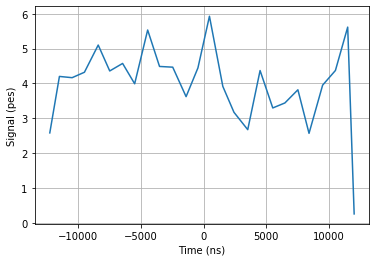

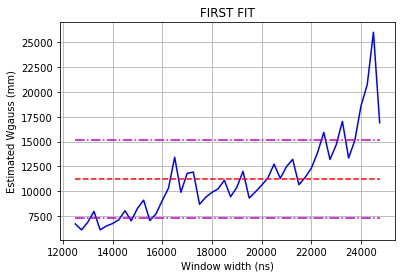

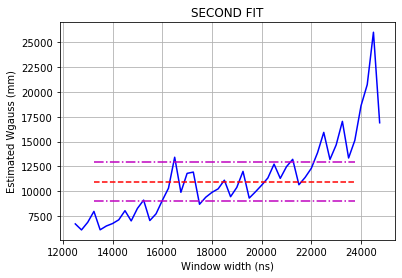

Wgauss = 8992.440974538238
Energy = 105.91567096518516
iEvt   = 12


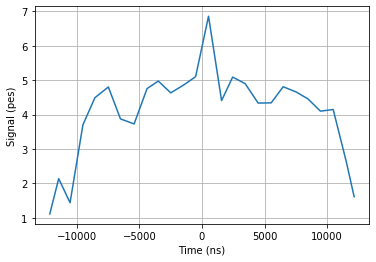

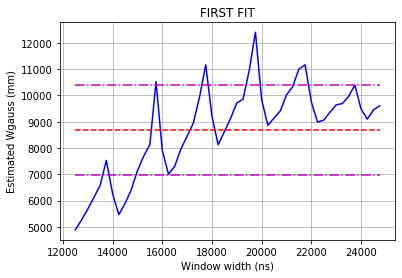

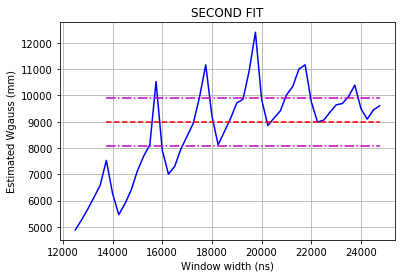

Wgauss = 9955.258793014074
Energy = 105.13265302682989
iEvt   = 14


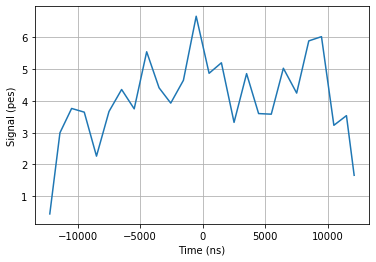

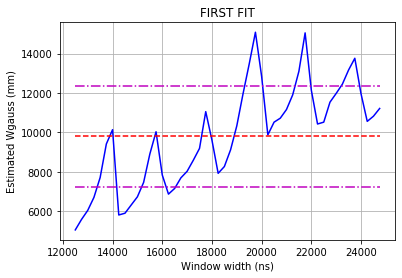

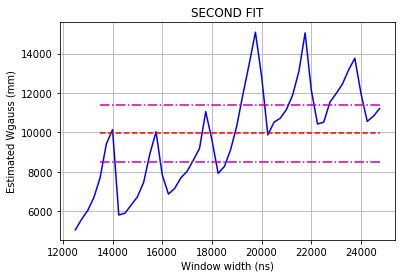

Wgauss = 11882.343719138285
Energy = 106.68277930112889
iEvt   = 16


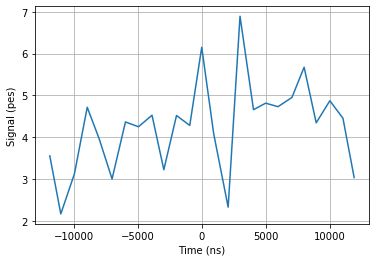

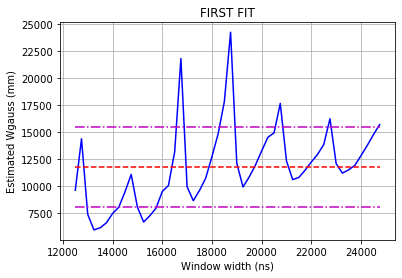

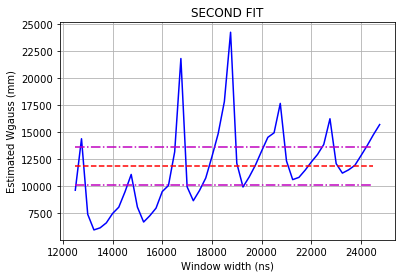

Wgauss = 7182.185231227964
Energy = 120.96484846345103
iEvt   = 19


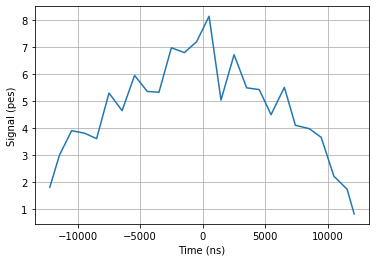

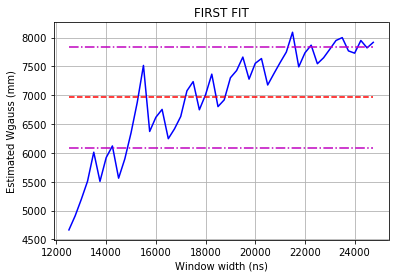

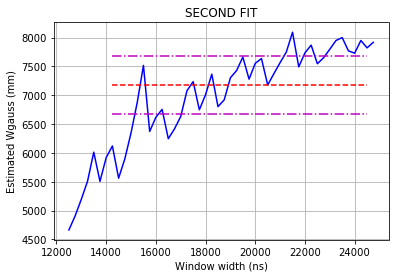

Wgauss = 7231.103918998903
Energy = 101.32087390556948
iEvt   = 23


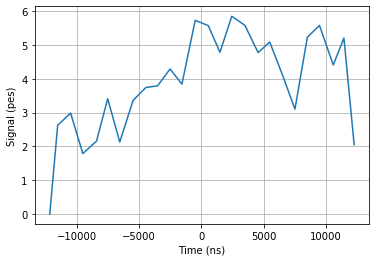

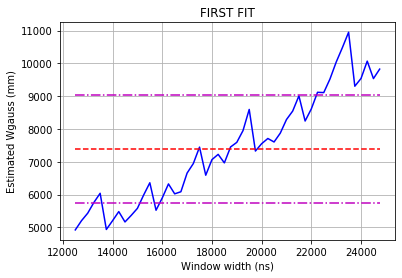

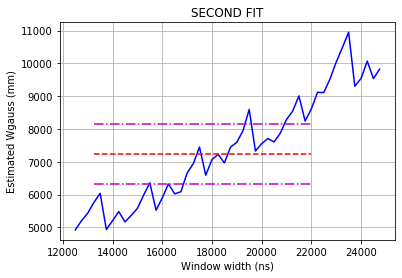

Wgauss = 8258.548835051452
Energy = 113.44484989528482
iEvt   = 33


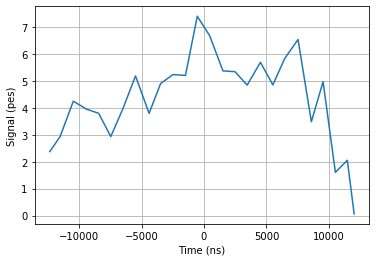

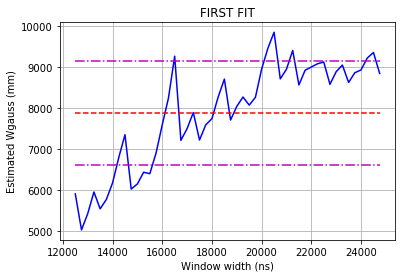

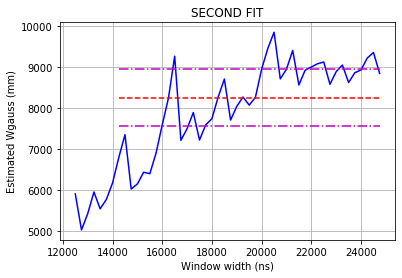

Wgauss = 9775.673144977945
Energy = 113.1781029958471
iEvt   = 34


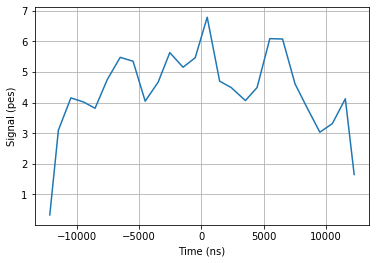

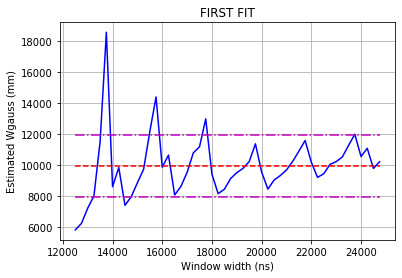

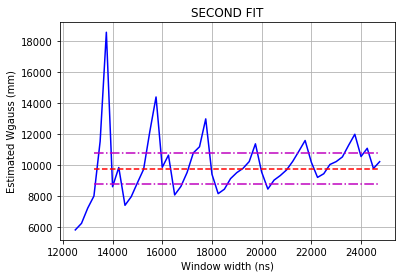

Wgauss = 8279.432913485545
Energy = 110.37901757761345
iEvt   = 42


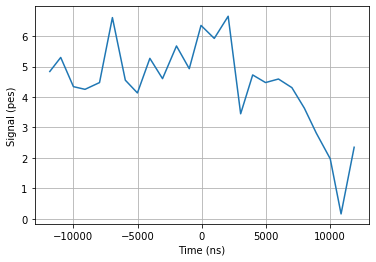

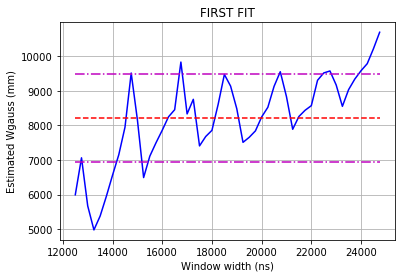

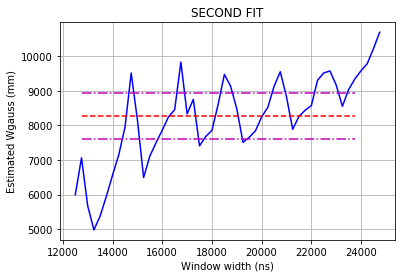

Wgauss = 8735.483474467654
Energy = 104.21022742947383
iEvt   = 48


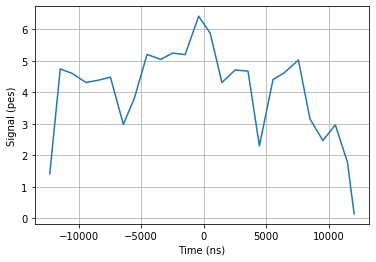

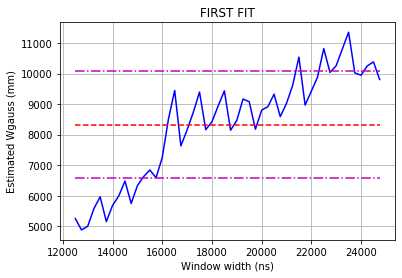

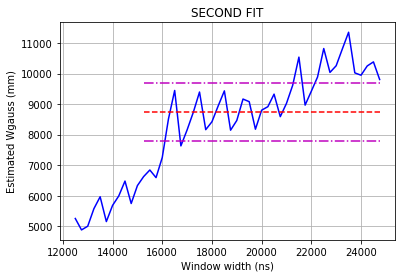

You might have an issue with event 12988 : it is big, but cannot fit a Z value.
Nasty events:  [12988]


In [23]:
# Get the Wgauss values by finding the flat line in the Wgauss vs window
all_Wgauss = []
nasty_events_W = []
functionality_cutoff = 2293.8670244413365

maxshow = 10
shown = 0
for ievt in range(len(events_window_Wgauss)):    
    
    nasty = False
    
    try:

        # First iteration of fit
        long_window_cut = events_window_cut > events_window_cut[-1] / 2
        xdata = events_window_cut[long_window_cut]
        ydata = events_window_Wgauss[ievt][long_window_cut]
        popt, pcov = curve_fit(const, xdata, ydata, p0 = np.mean(ydata))

        fitdata = const(xdata, *popt)
        stdev = np.std(ydata)
        errors = (fitdata - stdev, fitdata + stdev)

        stdev_mask = (ydata > errors[0]) & (ydata < errors[1])

        # Second iteration of fit, without outliers

        xdata2 = xdata[stdev_mask]
        ydata2 = ydata[stdev_mask]
        popt, pcov = curve_fit(const, xdata2, ydata2, p0 = np.mean(ydata))

        fitdata2 = const(xdata2, *popt)
        stdev2 = np.std(ydata2)
        errors2 = (fitdata2 - stdev2, fitdata2 + stdev2)

        Wgauss = popt[0]
        all_Wgauss.append(Wgauss)
        
        if (shown < maxshow and Emask[ievt] and Wgauss > 4000):
                        
            shown += 1
            
            print('Wgauss =', Wgauss)
            print('Energy =', events_energy[ievt])
            print('iEvt   =', ievt)
            
            # Plot the waveform
            plt.xlabel('Time (ns)')
            plt.ylabel('Signal (pes)')
            plt.plot(events_times[ievt] - np.mean(events_times[ievt]), events_sumwf[ievt])
            plt.grid(True)
            plt.show()

            # Plot the first fit
            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata, fitdata, '--', color='r')
            plt.plot(xdata, errors[0], '-.', color='m')
            plt.plot(xdata, errors[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Wgauss (mm)')
            plt.title('FIRST FIT')
            plt.grid(True)
            plt.show()

            # Plot the second fit
            plt.plot(xdata, ydata, color='b')
            plt.plot(xdata2, fitdata2, '--', color='r')
            plt.plot(xdata2, errors2[0], '-.', color='m')
            plt.plot(xdata2, errors2[1], '-.', color='m')
            plt.xlabel('Window width (ns)')
            plt.ylabel('Estimated Wgauss (mm)')
            plt.title('SECOND FIT')
            plt.grid(True)
            plt.show()    
        
    except:
        
        Wgauss = 0
        all_Wgauss.append(Wgauss)
        nasty = True
        
        if Emask[ievt]:
            print('You might have an issue with event', ievt, ': it is big, but cannot fit a Z value.')
            nasty_events_W.append(ievt)
    
all_Wgauss = np.array(all_Wgauss)
good_W = all_Wgauss > 0
print('Nasty events: ', nasty_events_W)

##############
EVENT NUMBER 3 ; E = 103.2
##############


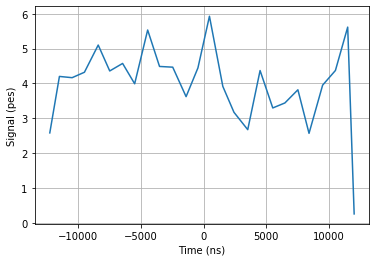

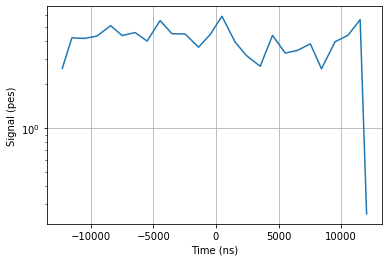

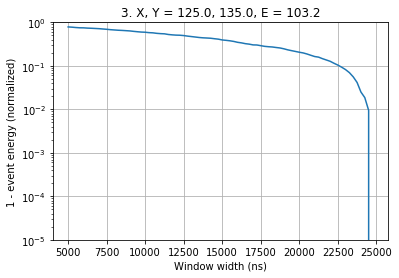

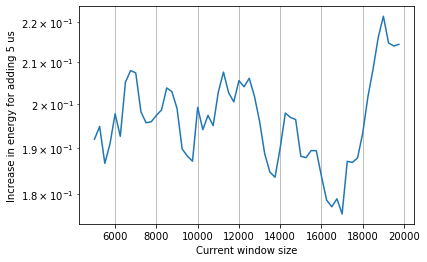

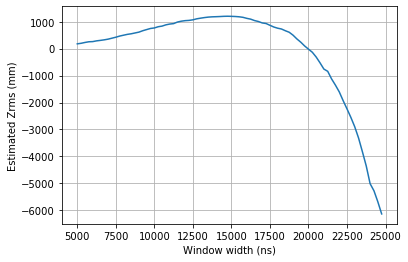

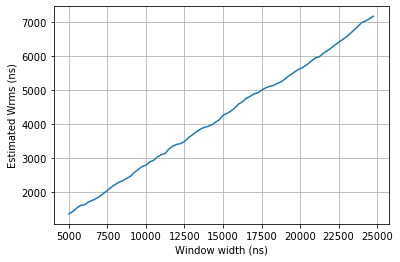

1355.3008216243786
0


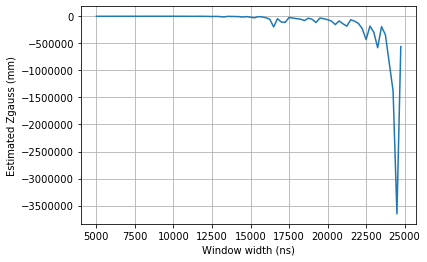

##############
EVENT NUMBER 12 ; E = 105.9
##############


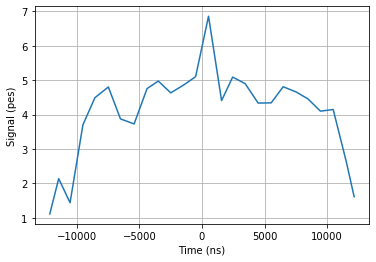

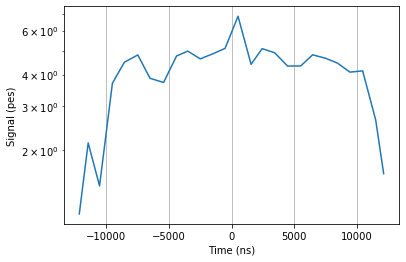

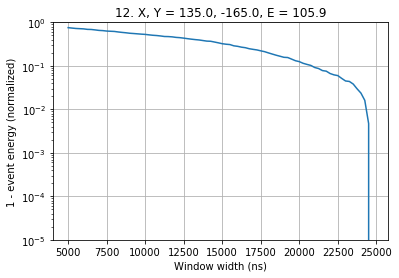

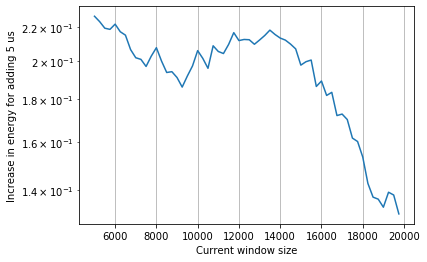

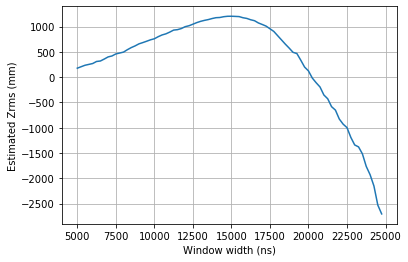

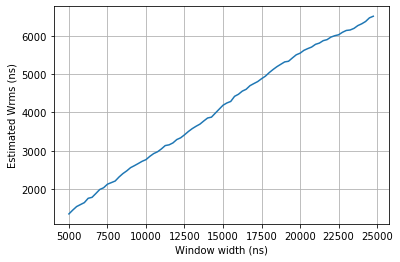

1346.1850324996642
0


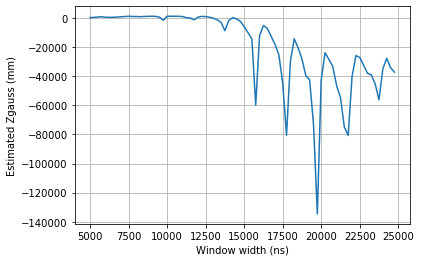

##############
EVENT NUMBER 14 ; E = 105.1
##############


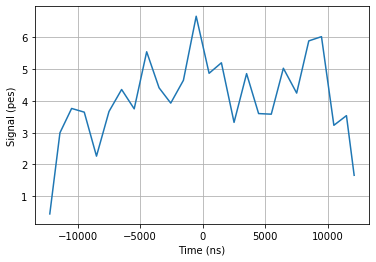

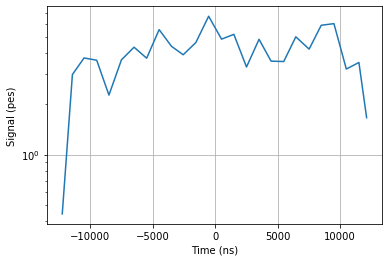

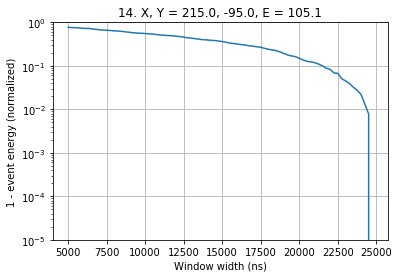

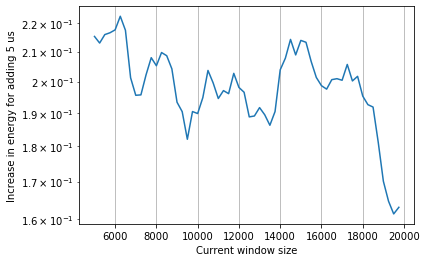

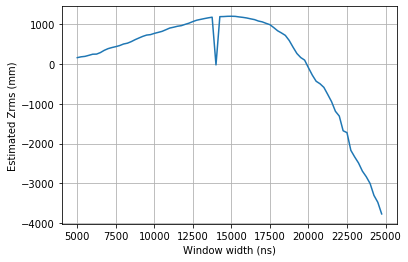

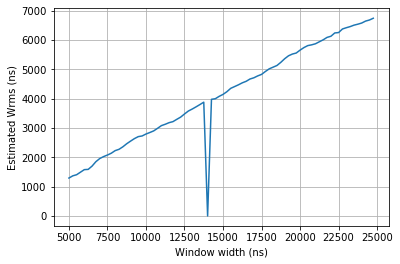

0.0
36


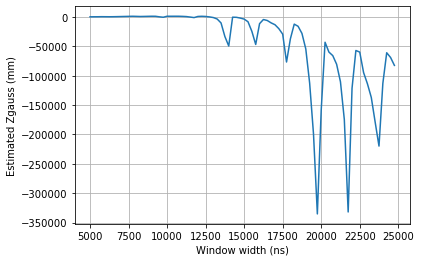

##############
EVENT NUMBER 16 ; E = 106.7
##############


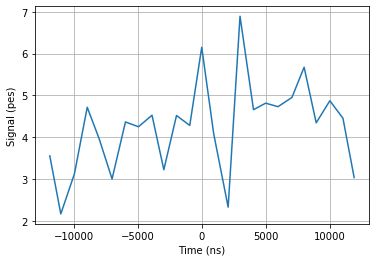

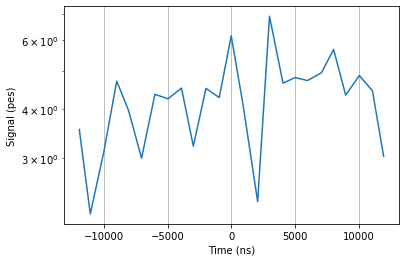

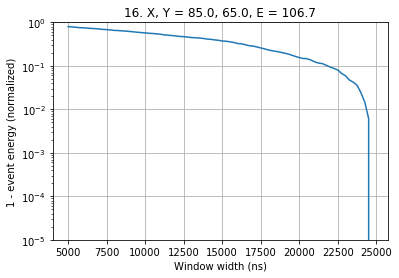

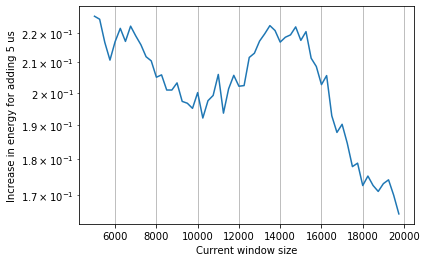

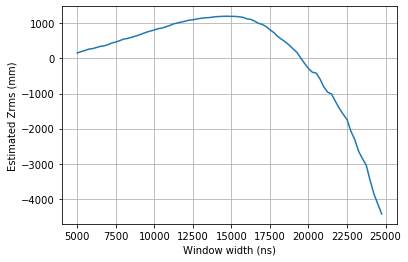

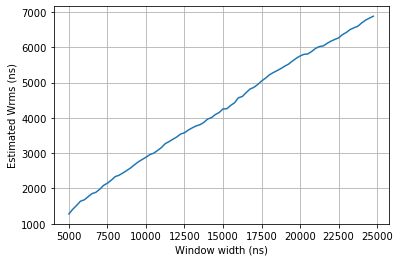

1276.9393979805368
0


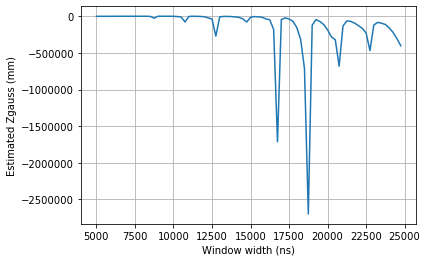

##############
EVENT NUMBER 19 ; E = 121.0
##############


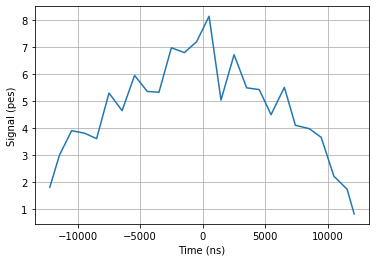

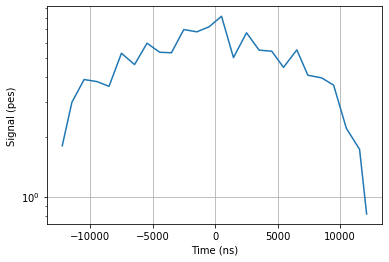

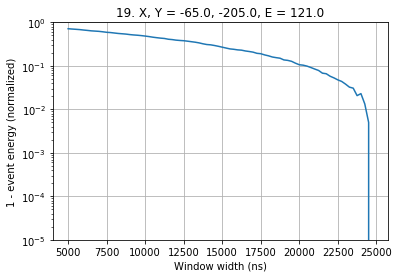

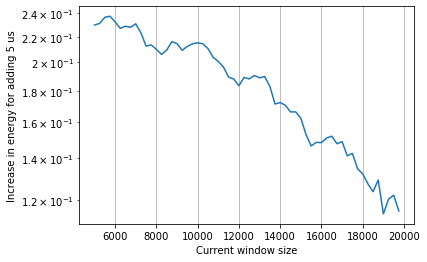

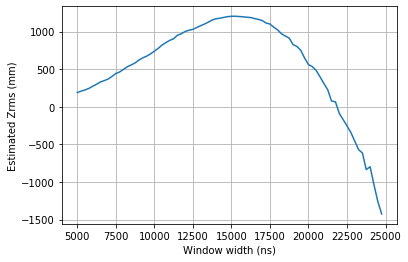

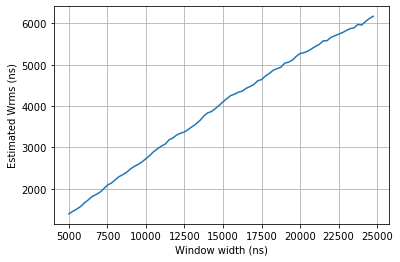

1389.0800222371545
0


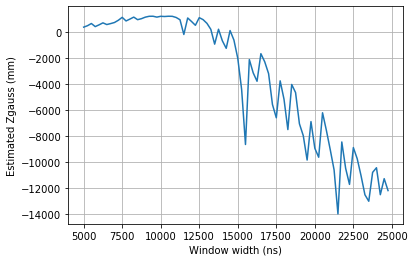

##############
EVENT NUMBER 23 ; E = 101.3
##############


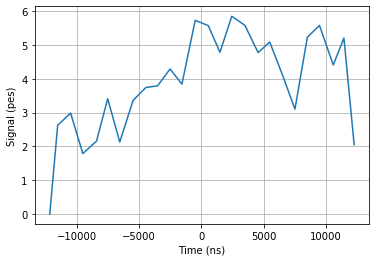

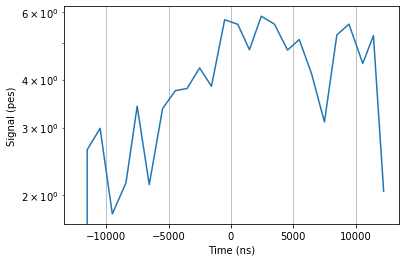

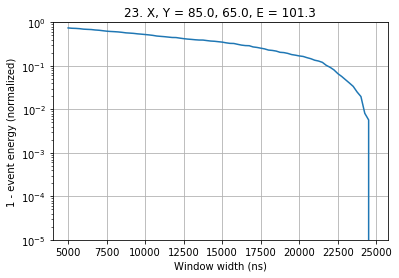

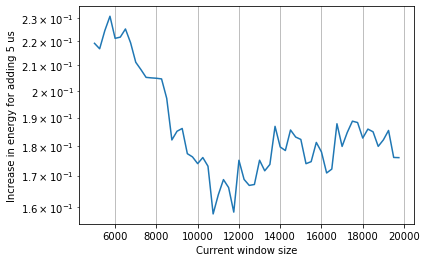

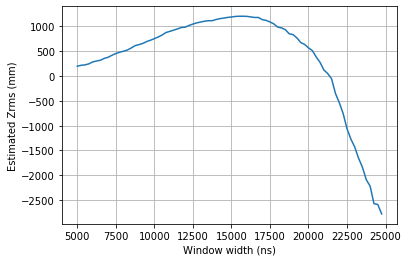

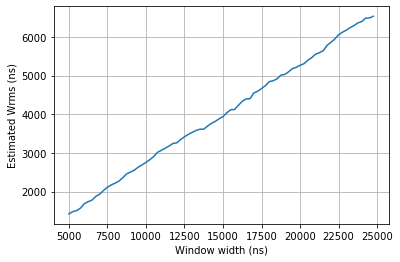

1420.4484536776322
0


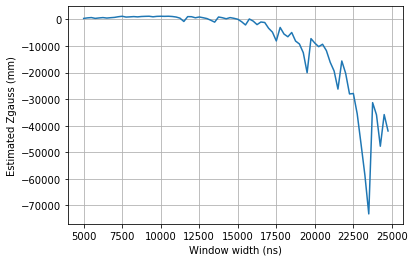

##############
EVENT NUMBER 24 ; E = 216.3
##############


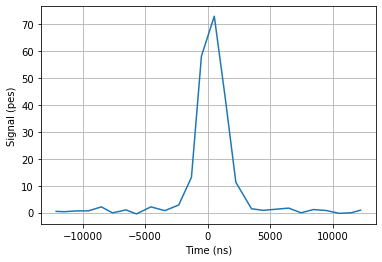

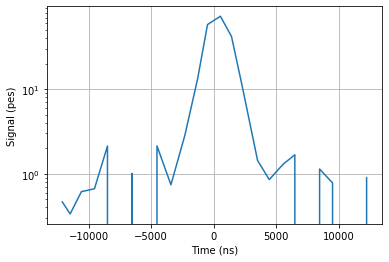

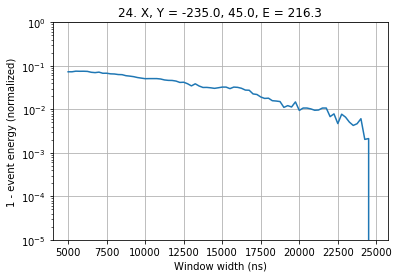

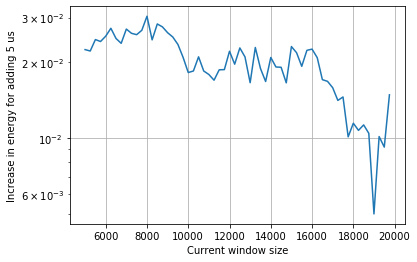

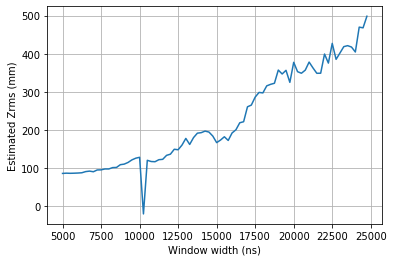

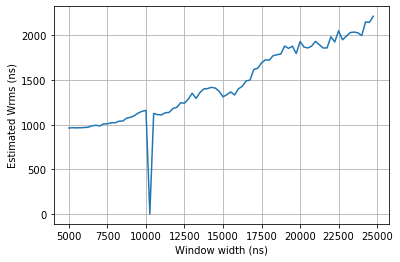

0.0
21


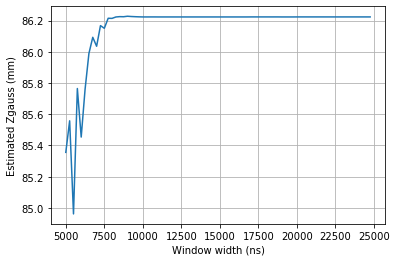

##############
EVENT NUMBER 30 ; E = 280.0
##############


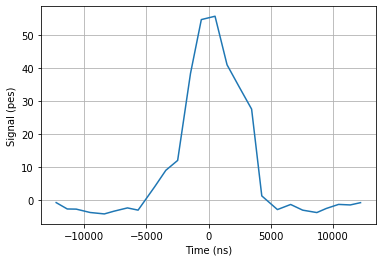

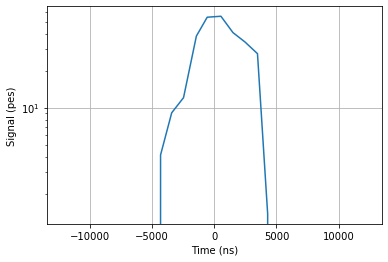

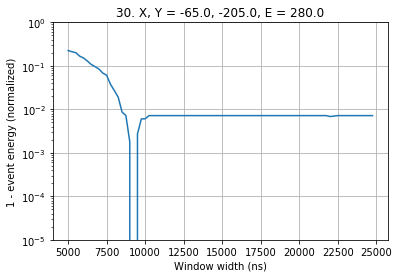

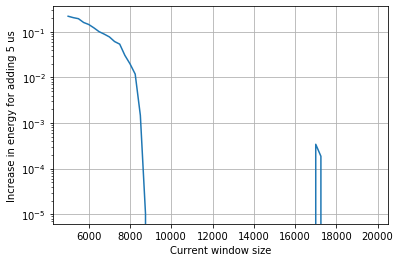

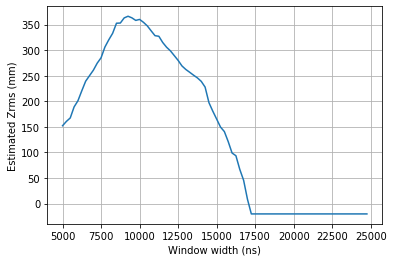

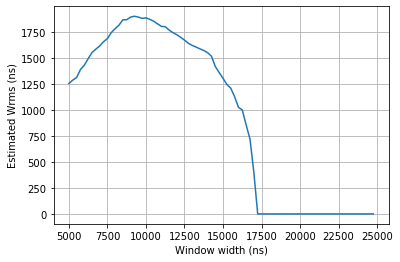

0.0
49


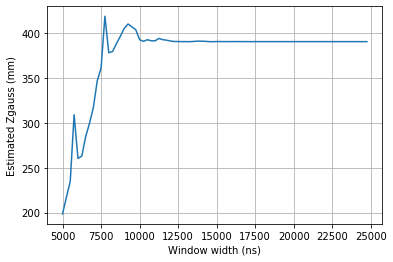

##############
EVENT NUMBER 33 ; E = 113.4
##############


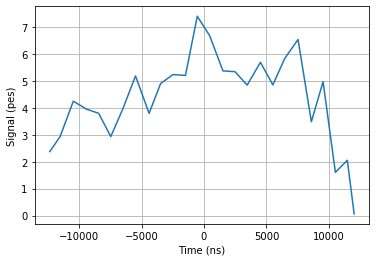

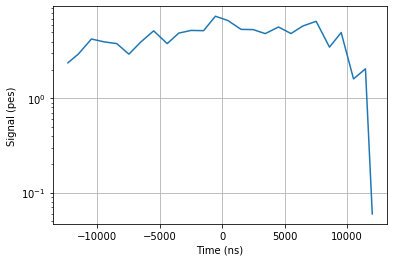

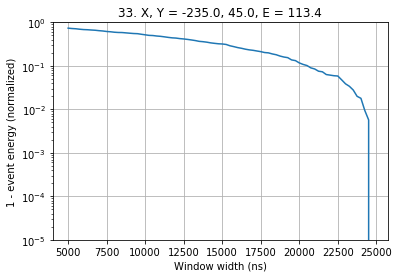

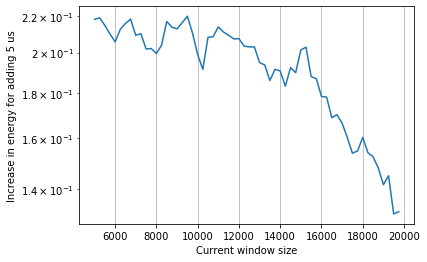

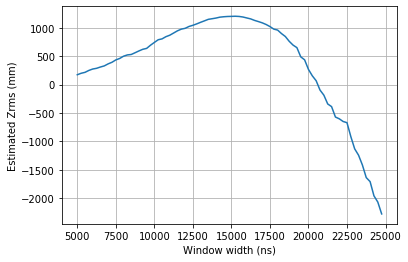

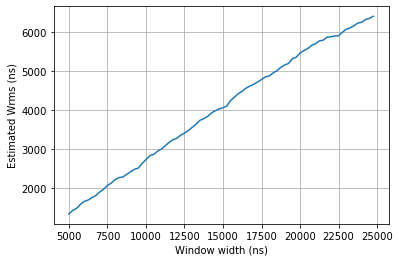

1337.3788817524335
0


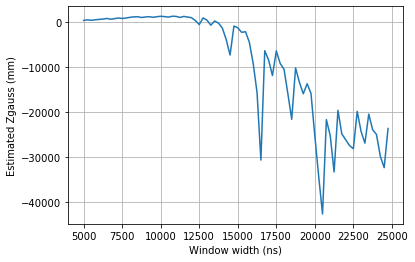

##############
EVENT NUMBER 34 ; E = 113.2
##############


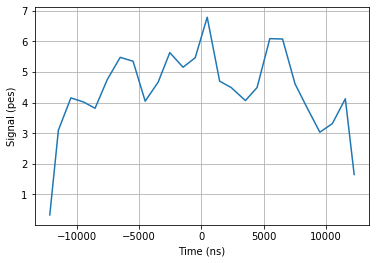

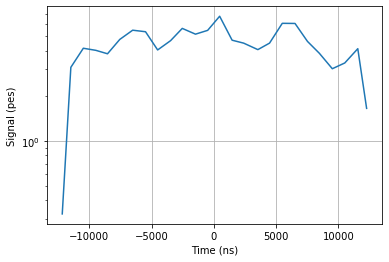

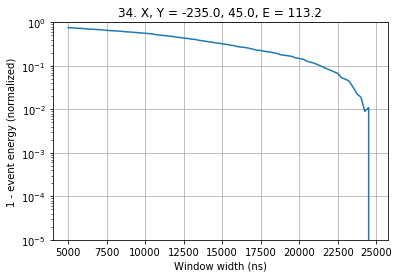

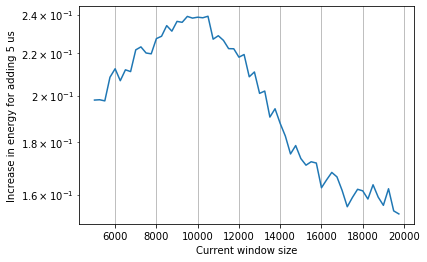

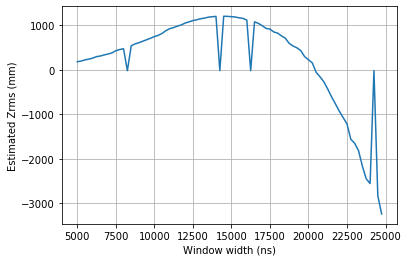

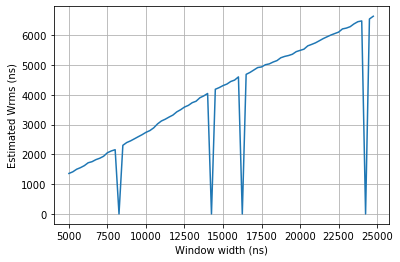

0.0
13


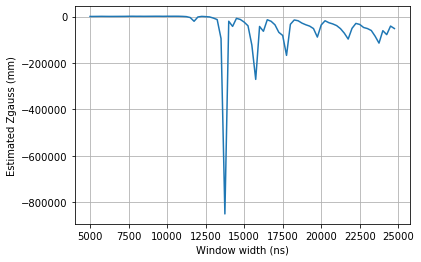

In [24]:
all_energy_cutoffs_999 = np.array([2 * (window_min + dwindow * np.argmax(window_energy_norm > 0.999)) * ns_per_sample for window_energy_norm in events_window_energy_norm])
all_energy_cutoffs_99 = np.array([2 * (window_min + dwindow * np.argmax(window_energy_norm > 0.99)) * ns_per_sample for window_energy_norm in events_window_energy_norm])
all_Zrms = np.array([ np.max(window_Zrms) for window_Zrms in events_window_Zrms ])
all_Wrms = np.array([ np.max(window_Wrms) for window_Wrms in events_window_Wrms ])
all_Xs = np.array( [window_maxX[-1] for window_maxX in events_window_maxX] )
all_Ys = np.array( [window_maxY[-1] for window_maxY in events_window_maxY] )

maxshow = 10
shown = 0
for i_evt in range(len(events_window_energy_norm)):
        
    if shown < maxshow and Emask[i_evt]:

        X = events_window_maxX[i_evt][-1]
        Y = events_window_maxY[i_evt][-1]
        E = round(max(events_window_energy[i_evt]), 1)
        
        shown += 1

        print('##############')
        print('EVENT NUMBER', i_evt, '; E =', E)
        print('##############')
        
        # Plot the waveform
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        plt.plot(events_times[i_evt] - np.mean(events_times[i_evt]), events_sumwf[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the waveform, log scale
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        plt.yscale('log')
        plt.plot(events_times[i_evt] - np.mean(events_times[i_evt]), events_sumwf[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the energy vs window width
        normed = np.array(events_window_energy_norm[i_evt])
        normed = 1 - normed
        plt.ylim(10**-5,10**0)
        plt.yscale('log')
        plt.title(str(i_evt)+'. X, Y = '+str(X)+', '+str(Y)+', E = '+str(E))
        plt.xlabel('Window width (ns)')
        plt.ylabel('1 - event energy (normalized)')
        plt.grid(True)
        plt.plot(events_window_cut, normed)
        plt.show()

        # Plot the increase for including 5 more us
        windows_in_5_us = int((5000 / ns_per_sample) / (2 * dwindow))
        change_next_five_us = np.array(events_window_energy_norm[i_evt][windows_in_5_us:]) - np.array(events_window_energy_norm[i_evt][:-windows_in_5_us])    
        plt.xlabel('Current window size')
        plt.ylabel('Increase in energy for adding 5 us')
        plt.yscale('log')
        plt.plot(events_window_cut[:-windows_in_5_us], change_next_five_us)
        plt.grid(True)
        plt.show()

        # Plot the Zrms estimate vs window width
        plt.xlabel('Window width (ns)')
        plt.ylabel('Estimated Zrms (mm)')
        plt.plot(events_window_cut, events_window_Zrms[i_evt])
        plt.grid(True)
        plt.show()

        # Plot the Wrms estimate vs window width
        plt.xlabel('Window width (ns)')
        plt.ylabel('Estimated Wrms (ns)')
        plt.plot(events_window_cut, events_window_Wrms[i_evt])
        plt.grid(True)
        plt.show()

        print(min(events_window_Wrms[i_evt]))
        print(np.argmin(np.array(events_window_Wrms[i_evt])))
        
        # Plot the Zgauss estimate vs window width
        plt.xlabel('Window width (ns)')
        plt.ylabel('Estimated Zgauss (mm)')
        plt.plot(events_window_cut, events_window_Zgauss[i_evt])
        plt.grid(True)
        plt.show()

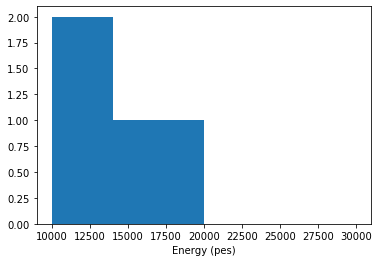

In [25]:
plt.hist(events_energy, bins = 10, range=(10000, 30000))
plt.xlabel('Energy (pes)')
plt.show()

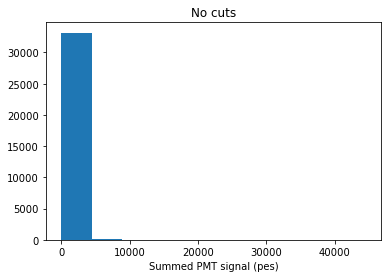

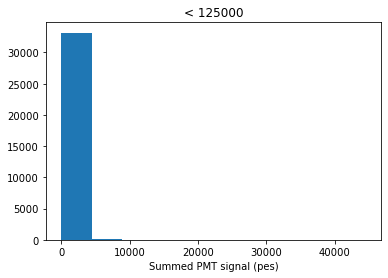

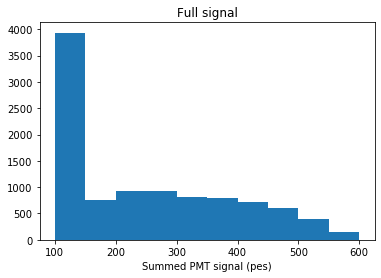

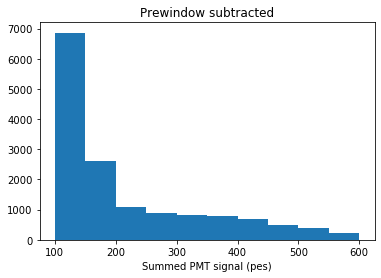

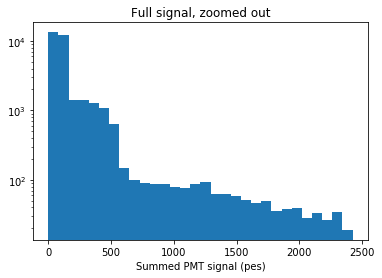

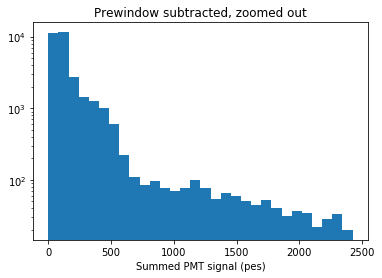

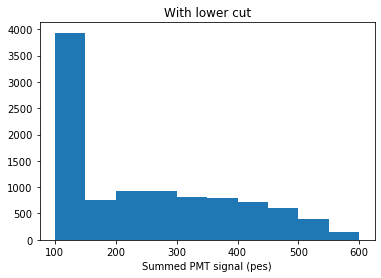

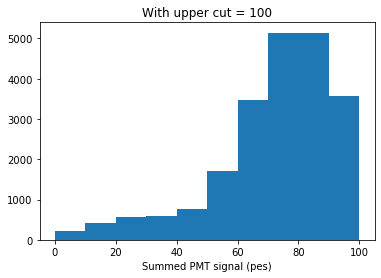

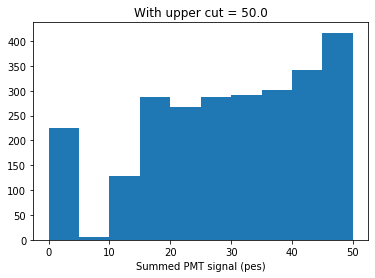

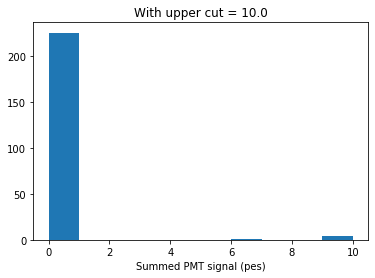

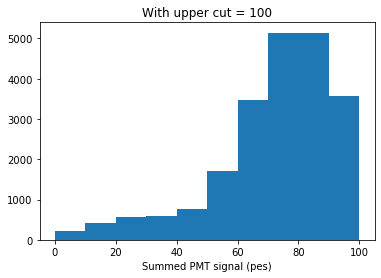

Fraction below cutoff = 64.9


In [26]:
plt.title('No cuts')
plt.hist(events_energy, bins = 10)
plt.xlabel('Summed PMT signal (pes)')
plt.show()

plt.title('< 125000')
plt.hist(events_energy[events_energy < 125000], bins = 10)
plt.xlabel('Summed PMT signal (pes)')
plt.show()

plt.title('Full signal')
plt.hist(events_energy, bins = 10, range = (Ecut[0], Ecut[1]))
plt.xlabel('Summed PMT signal (pes)')
plt.show()

plt.title('Prewindow subtracted')
plt.hist(events_energy_subtracted, bins = 10, range = (Ecut[0], Ecut[1]))
plt.xlabel('Summed PMT signal (pes)')
plt.show()

plt.title('Full signal, zoomed out')
plt.hist(events_energy, bins = 30, range = (0, np.percentile(events_energy, 99)))
plt.yscale('log')
plt.xlabel('Summed PMT signal (pes)')
plt.show()

plt.title('Prewindow subtracted, zoomed out')
plt.hist(events_energy_subtracted, bins = 30, range = (0, np.percentile(events_energy, 99)))
plt.yscale('log')
plt.xlabel('Summed PMT signal (pes)')
plt.show()

plt.title('With lower cut')
plt.hist(events_energy, bins = 10, range = (Ecut[0], Ecut[1]))
plt.xlabel('Summed PMT signal (pes)')
plt.show()

plt.title('With upper cut = '+str(Ecut[0]))
plt.hist(events_energy, bins = 10, range = (0, Ecut[0]))
plt.xlabel('Summed PMT signal (pes)')
plt.show()

plt.title('With upper cut = '+str(Ecut[0]/2))
plt.hist(events_energy, bins = 10, range = (0, Ecut[0]/2))
plt.xlabel('Summed PMT signal (pes)')
plt.show()

plt.title('With upper cut = '+str(Ecut[0]/10))
plt.hist(events_energy, bins = 10, range = (0, Ecut[0]/10))
plt.xlabel('Summed PMT signal (pes)')
plt.show()

plt.title('With upper cut = '+str(noise_bound))
plt.hist(events_energy, bins = 10, range = (0, noise_bound))
plt.xlabel('Summed PMT signal (pes)')
plt.show()

print('Fraction below cutoff =', round(100*len(events_energy[events_energy < noise_bound])/len(events_energy),1))

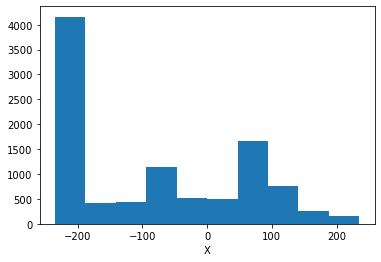

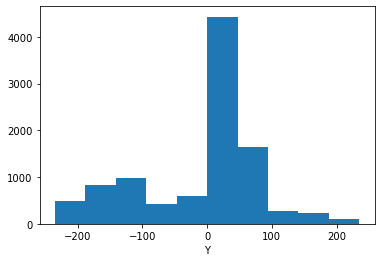

In [27]:
plt.hist(all_Xs[Emask])
plt.xlabel('X')
plt.show()

plt.hist(all_Ys[Emask])
plt.xlabel('Y')
plt.show()

In [28]:
print(len(all_Xs))
print(len(Emask))
print(len(all_Zgauss))

33256
33256
33256


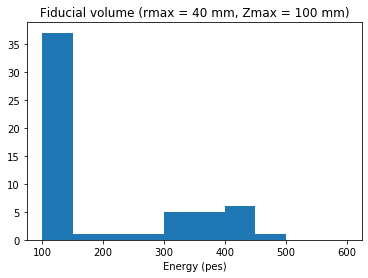

In [29]:
rmax = 40
fid = Emask & ((all_Xs**2 + all_Ys**2) < rmax**2) & (all_Zgauss < 100)
plt.title('Fiducial volume (rmax = 40 mm, Zmax = 100 mm)')
plt.hist(events_energy[fid], bins = 10, range = (Ecut[0], Ecut[1]))
plt.xlabel('Energy (pes)')
plt.show()

In [30]:
# A circle with radius R can inscribe a square of diagonal 2R, and the sides obey
# a2 + a2 = c2 = (2R)2 = 4R2
# So 2a2 = 4R2 => a = sqrt(2) R
# Thus, the min and max x and y are R / sqrt(2)

In [31]:
R = 200
boundaries = np.linspace(-R / sqrt(2), R / sqrt(2), 6)
intervals = [ (round(boundaries[i],1), round(boundaries[i+1],1)) for i in range(len(boundaries) - 1)]

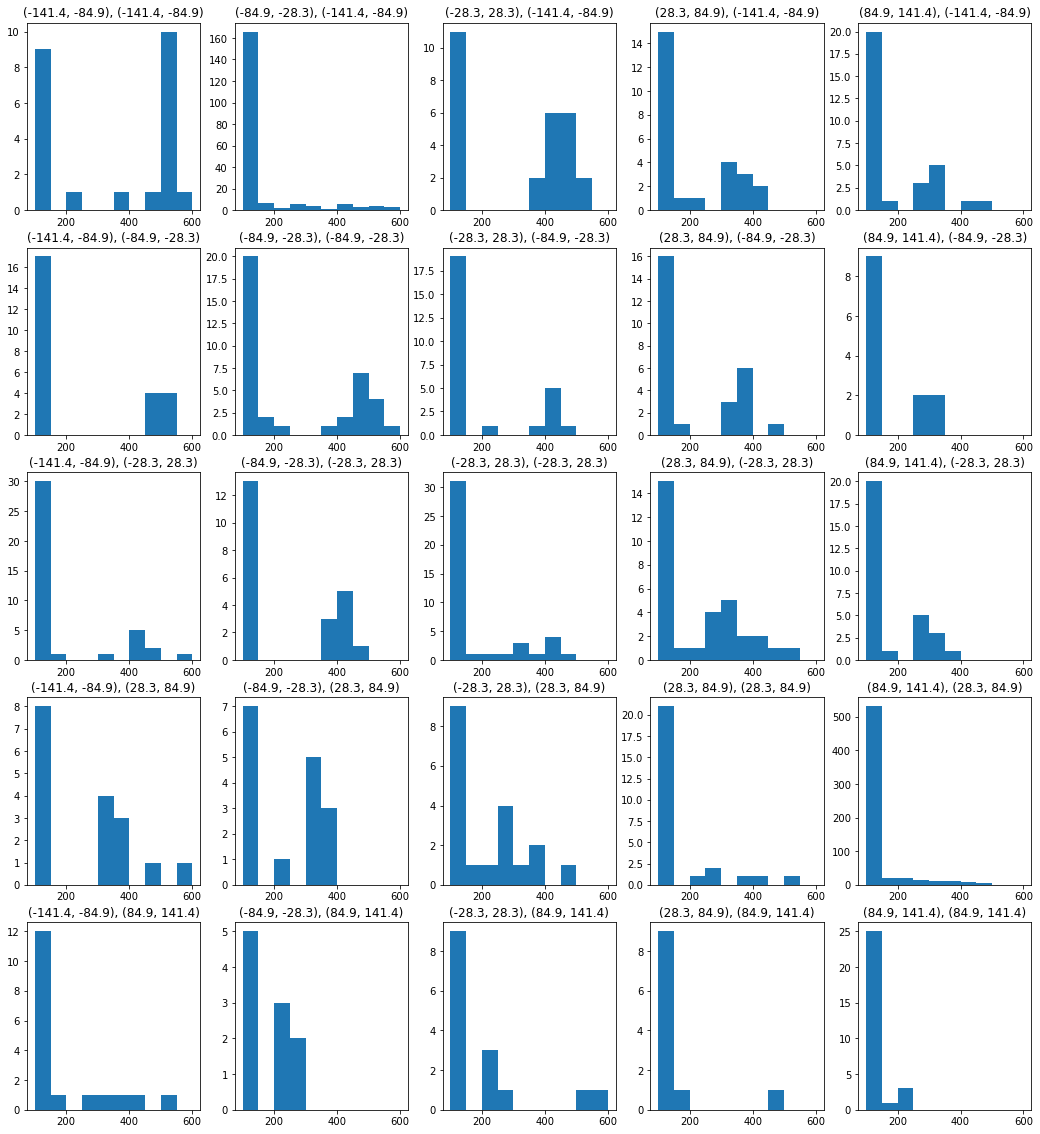

In [32]:
fig, axs = plt.subplots(len(intervals), len(intervals), figsize=(18, 20))

for ix in range(len(intervals)):
    for iy in range(len(intervals)):
        xr = intervals[ix]
        yr = intervals[iy]
        region = Emask & (xr[0] < all_Xs) & (all_Xs < xr[1]) & (yr[0] < all_Ys) & (all_Ys < yr[1]) & (all_Zgauss < 100)
        axs[iy, ix].hist(events_energy[region], range = Ecut)
        axs[iy, ix].set_title(str(xr)+', '+str(yr))

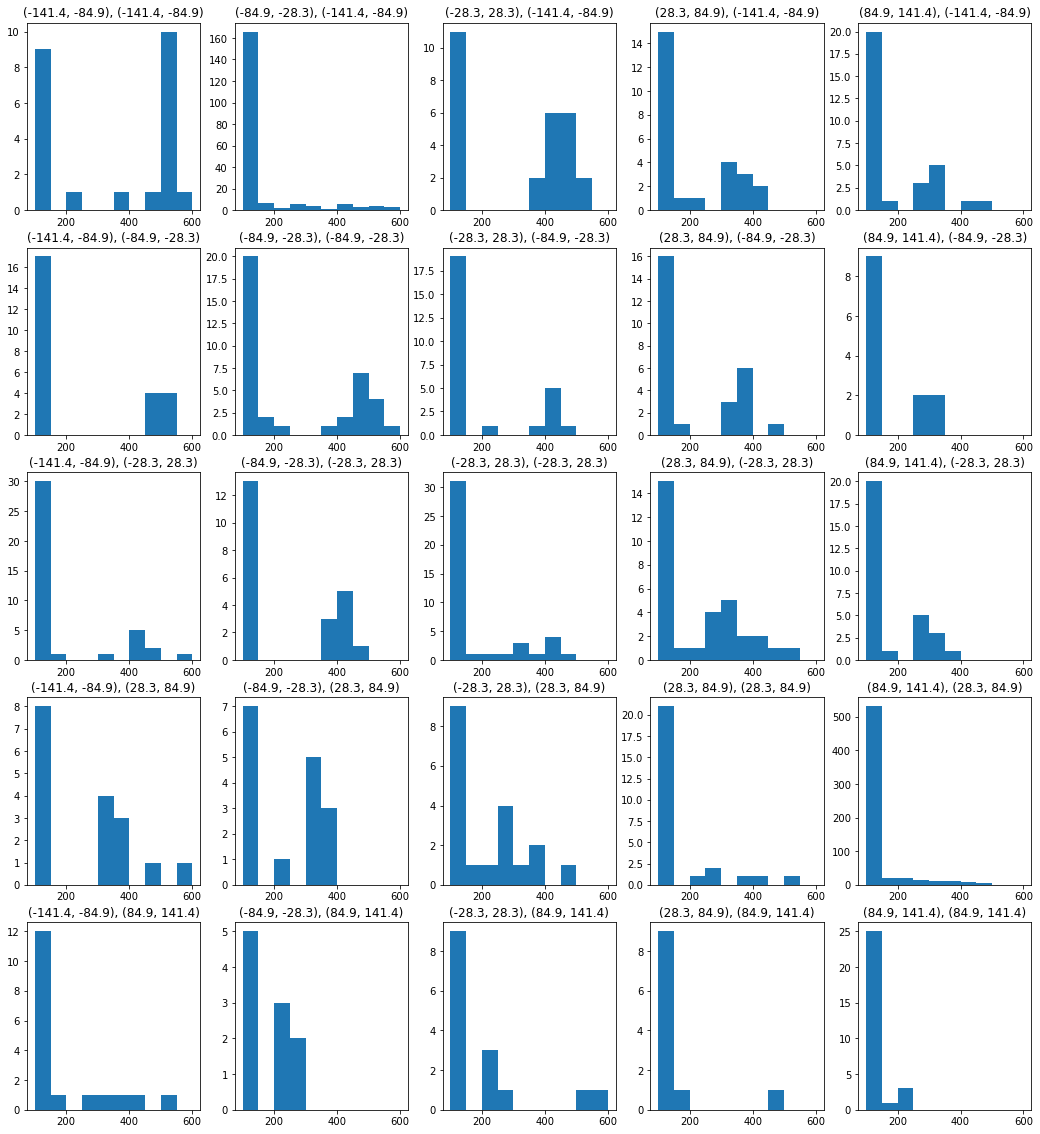

In [33]:
fig, axs = plt.subplots(len(intervals), len(intervals), figsize=(18, 20))

for ix in range(len(intervals)):
    for iy in range(len(intervals)):
        xr = intervals[ix]
        yr = intervals[iy]
        region = Emask & (xr[0] < all_Xs) & (all_Xs < xr[1]) & (yr[0] < all_Ys) & (all_Ys < yr[1]) & (all_Zgauss < 100)
        axs[iy, ix].hist(events_energy[region], range = Ecut)
        axs[iy, ix].set_title(str(xr)+', '+str(yr))

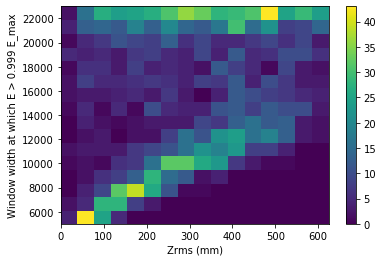

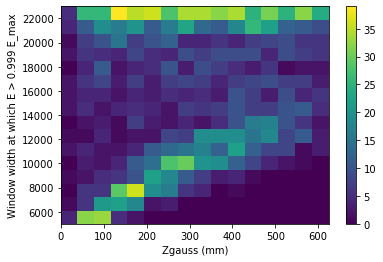

In [34]:
window_range = (5000, 23000)
bins = (16, 16)
zrange = (0, 625)

hrms = plt.hist2d(all_Zrms[Emask], all_energy_cutoffs_999[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.999 E_max')
plt.colorbar(hrms[3])
plt.show()

hgauss = plt.hist2d(all_Zgauss[Emask], all_energy_cutoffs_999[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.999 E_max')
plt.colorbar(hgauss[3])
plt.show()

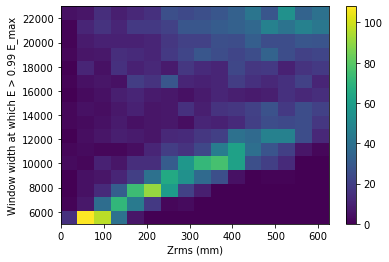

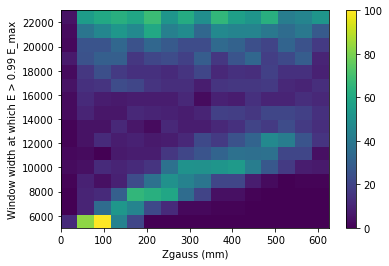

In [35]:
hrms = plt.hist2d(all_Zrms[Emask], all_energy_cutoffs_99[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.colorbar(hrms[3])
plt.show()

hgauss = plt.hist2d(all_Zgauss[Emask], all_energy_cutoffs_99[Emask], bins = bins, range = (zrange, window_range))
plt.xlim(zrange)
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.colorbar(hgauss[3])
plt.show()

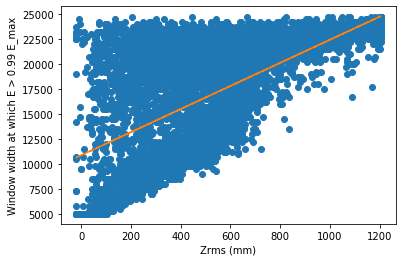

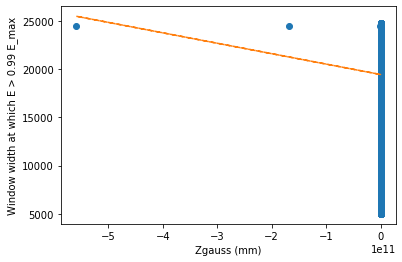

In [36]:
p = np.polyfit(all_Zrms[Emask], all_energy_cutoffs_99[Emask], 1)
line = np.array(all_Zrms)*p[0] + p[1]
plt.xlabel('Zrms (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.plot(all_Zrms[Emask], all_energy_cutoffs_99[Emask], 'o')
plt.plot(all_Zrms, line, '--')
plt.show()

p = np.polyfit(all_Zgauss[Emask], all_energy_cutoffs_99[Emask], 1)
line = np.array(all_Zgauss[Emask])*p[0] + p[1]
plt.xlabel('Zgauss (mm)')
plt.ylabel('Window width at which E > 0.99 E_max')
plt.plot(all_Zgauss[Emask], all_energy_cutoffs_99[Emask], 'o')
plt.plot(all_Zgauss[Emask], line, '--')
plt.show()

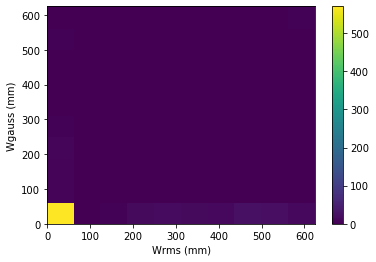

In [37]:
hW = plt.hist2d(all_Wrms, all_Wgauss, range = (zrange, zrange))
plt.xlabel('Wrms (mm)')
plt.ylabel('Wgauss (mm)')
plt.colorbar(hW[3])
plt.show()

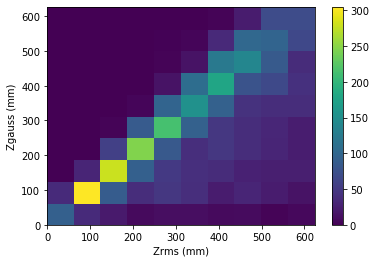

In [38]:
hZ = plt.hist2d(all_Zrms[Emask], all_Zgauss[Emask], range = (zrange, zrange))
plt.xlabel('Zrms (mm)')
plt.ylabel('Zgauss (mm)')
plt.colorbar(hZ[3])
plt.show()

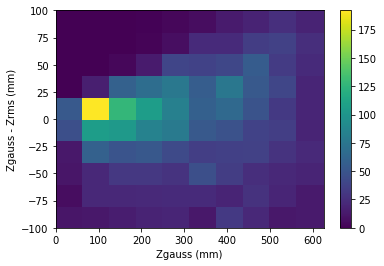

In [39]:
all_dZ = np.array(all_Zgauss[Emask]) - np.array(all_Zrms[Emask])
dzrange = (-100, 100)
hdZ = plt.hist2d(all_Zgauss[Emask], all_dZ, range = (zrange, dzrange))
plt.xlabel('Zgauss (mm)')
plt.ylabel('Zgauss - Zrms (mm)')
plt.colorbar(hdZ[3])
plt.show()

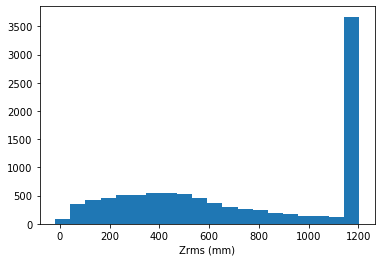

In [40]:
plt.hist(all_Zrms[Emask], bins = 20)
plt.xlabel('Zrms (mm)')
plt.show()

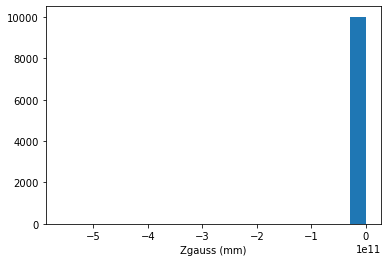

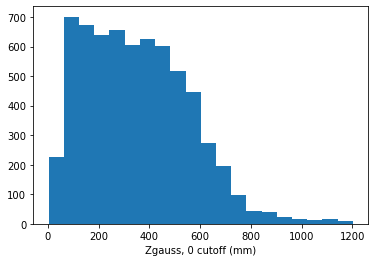

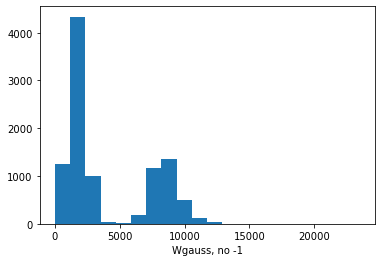

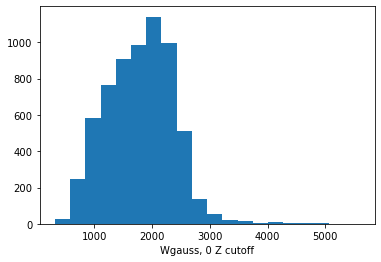

In [41]:
plt.hist(all_Zgauss[Emask], bins = 20)
plt.xlabel('Zgauss (mm)')
plt.show()

plt.hist(all_Zgauss[Emask & (all_Zgauss > 0)], bins = 20)
plt.xlabel('Zgauss, 0 cutoff (mm)')
plt.show()

plt.hist(all_Wgauss[Emask & (all_Wgauss != -1)], bins = 20)
plt.xlabel('Wgauss, no -1')
plt.show()

plt.hist(all_Wgauss[Emask & (all_Zgauss > 0)], bins = 20)
plt.xlabel('Wgauss, 0 Z cutoff')
plt.show()

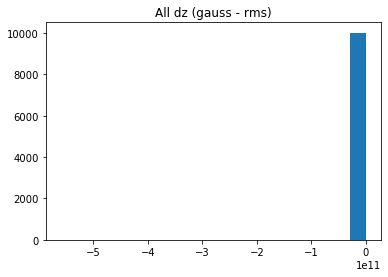

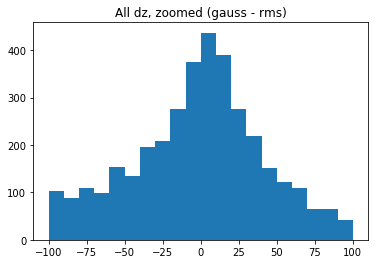

In [42]:
dZ = all_Zgauss[Emask] - all_Zrms[Emask]

plt.hist(dZ, bins = 20)
plt.title('All dz (gauss - rms)')
plt.show()

plt.hist(dZ, bins = 20, range = (-100, 100))
plt.title('All dz, zoomed (gauss - rms)')
plt.show()

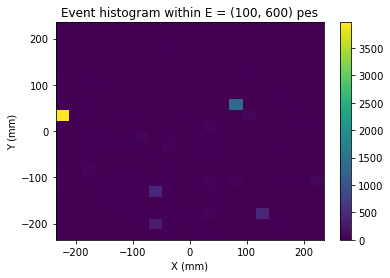

In [43]:
hxy = plt.hist2d(all_Xs[Emask], all_Ys[Emask], bins = 20)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Event histogram within E = '+str(Ecut)+' pes')
plt.colorbar(hxy[3])
plt.show()

In [44]:
ntotal  = len(events_sumwf)
nselect = len(events_sumwf[Emask])
selper  = round(100 * nselect / ntotal, 1)
print('Number of total events    =', ntotal)
print('Number of selected events =', nselect)
print('Selected percent          =', selper, '%')

Number of total events    = 33256
Number of selected events = 10014
Selected percent          = 30.1 %


In [45]:
max(all_Wgauss < 0)

True

In [46]:
max(all_Wgauss[all_Zgauss < 0])

86864.40853780089

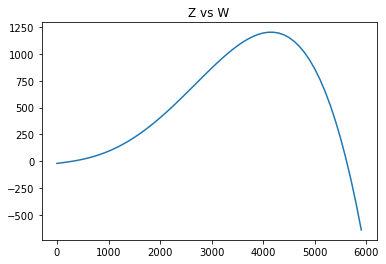

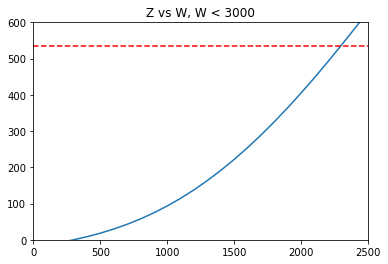

In [47]:
Ws = np.arange(0, 6000, 100)
Zs = exp_dt(Ws / 1000)
cutoff = Ws*0 + 534

plt.plot(Ws, Zs)
plt.title('Z vs W')
plt.show()

plt.plot(Ws, Zs)
plt.plot(Ws, cutoff, '--', color='r')
plt.title('Z vs W, W < 3000')
plt.xlim(0, 2500)
plt.ylim(0, 600)
plt.show()

In [48]:
# The cutoff W is the point where exp_dt gives an estimate beyond the
# chamber depth for the Z location of the event

max_depth = 534

def max_depth_offset(W):
    return (exp_dt(W/1000) - max_depth)**2

from scipy.optimize import minimize

cutoff_guess = 2300
res = minimize(max_depth_offset, cutoff_guess)

print('Cutoff value =', res['x'][0])

Cutoff value = 2293.8670244413365


In [49]:
def weighted_avg_and_std(values, weights, debug=False):
    """
    Return the weighted average and standard deviation
    values, weights -- Numpy ndarrays with the same shape.
    """
    if debug:
        print('Input values   =', values)
        print('Input weights  =', weights)
        print('Sum of weights =', np.sum(weights))

    if np.sum(weights) > 0:
        average = np.average(values, weights=weights)
        variance = np.average((values-average)**2, weights=weights)
        if debug: print('Average, variance =', average, variance)
        std = np.sqrt(max(0.,variance))
    else:
        if debug:
            print('WARNING - NOT ENOUGH WEIGHTS TO CALCULATE.')
        average = np.mean(values)
        std = 0.

    return average, std

0 , 0
R2 = 0.9906700362845625
E  = 216.34532888367877


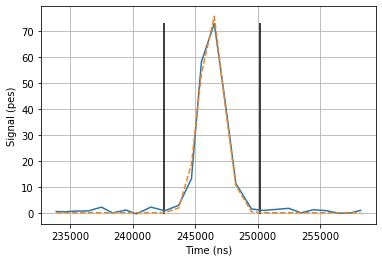

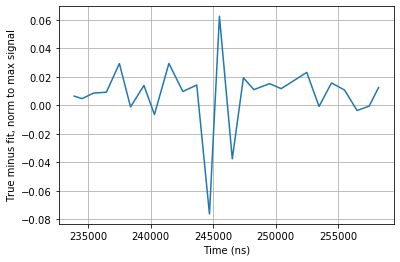

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9897547293392644
E  = 757.4130591376276


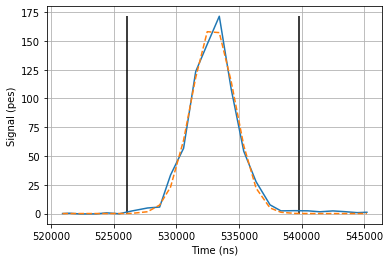

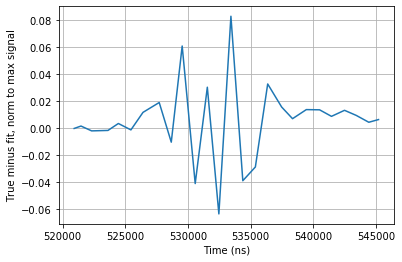

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9707875707888313
E  = 487.6996797673114


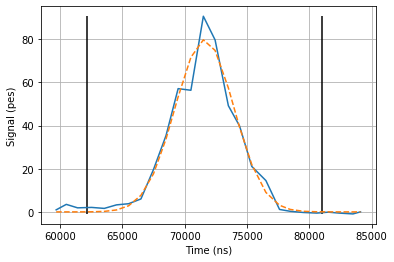

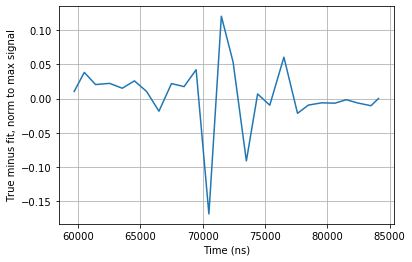

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9630157549488723
E  = 403.26955847298996


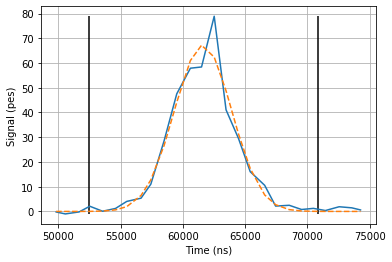

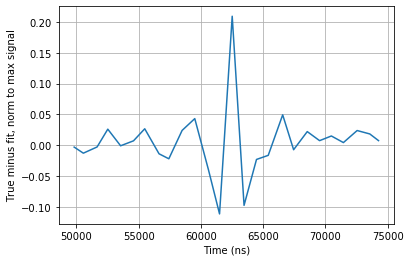

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9556660680622633
E  = 476.2006679062614


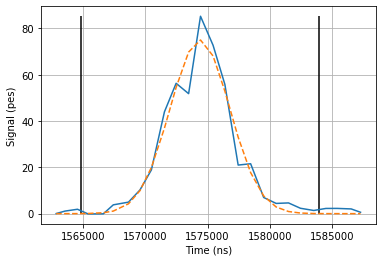

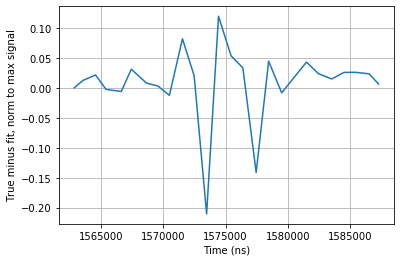

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9496205280488236
E  = 1655.1161240945441


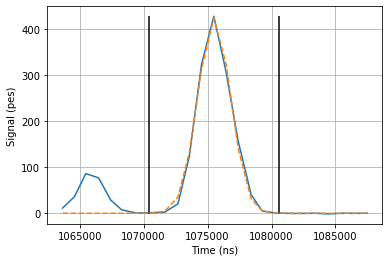

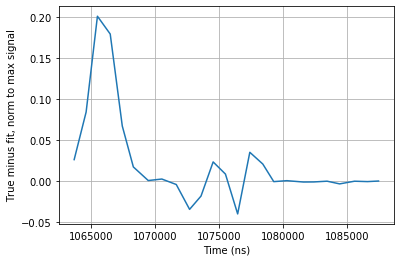

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9340338627507876
E  = 179.22723710142216


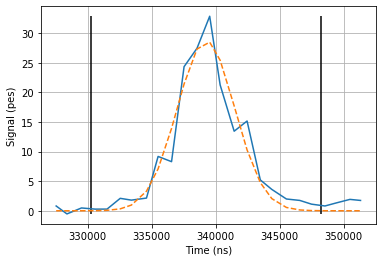

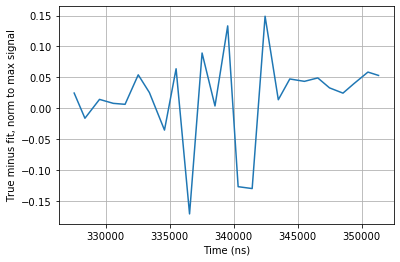

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9232413474922176
E  = 32.804252366331426


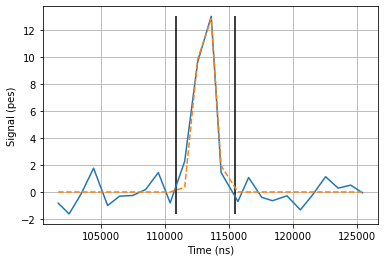

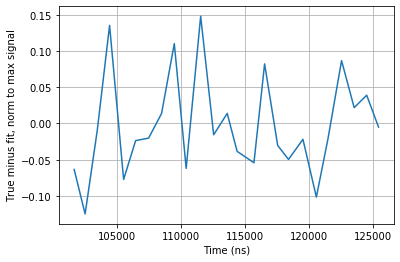

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.9190530515543243
E  = 151.54752500610263


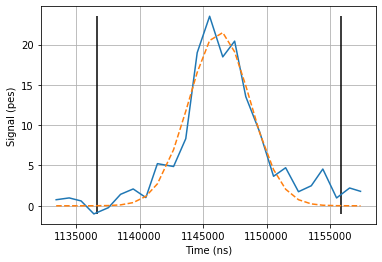

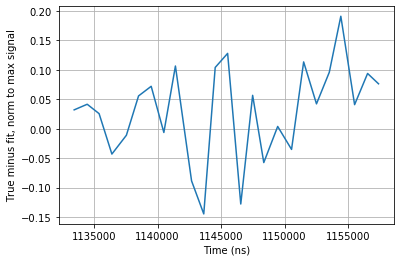

R2 = 0.901393236158398
E  = 208.62731507872135


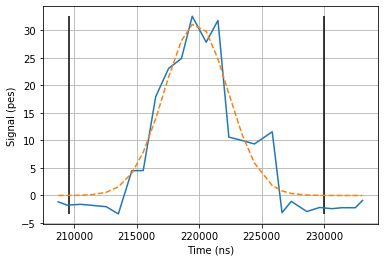

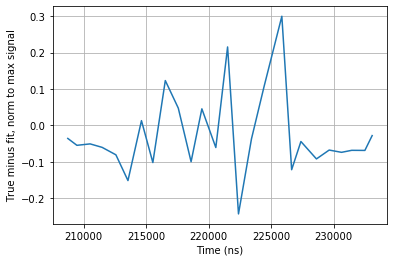

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8936954564271682
E  = 1502.5629991597996


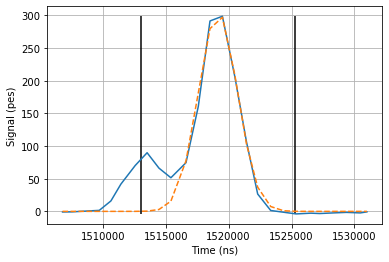

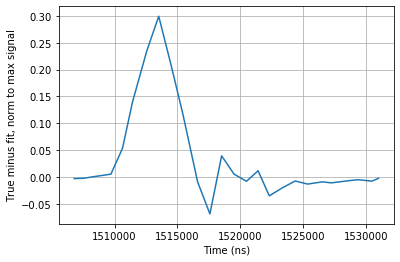

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


1000 , 1000
R2 = 0.8864488696180803
E  = 171.0527827185083


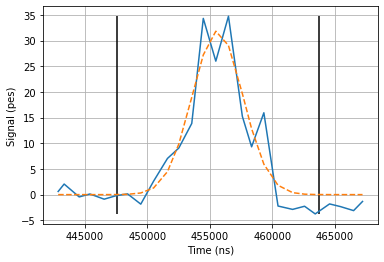

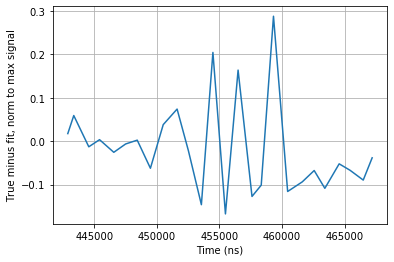

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8752328129636452
E  = 3504.7443670058556


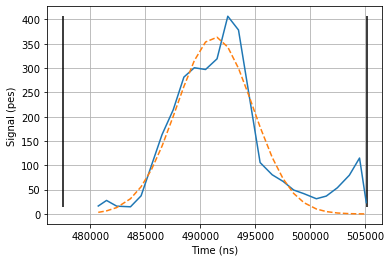

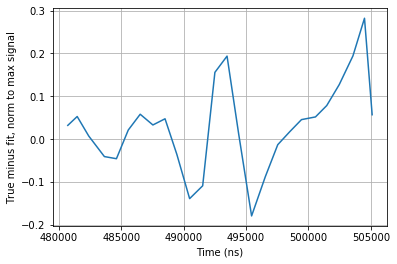

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8693690107060281
E  = 66.37536026510568


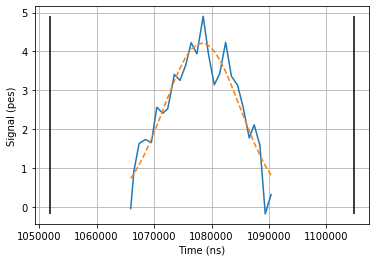

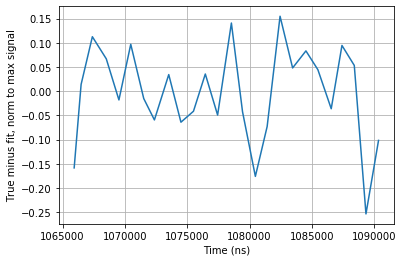

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8573725427996404
E  = 89.99053043692943


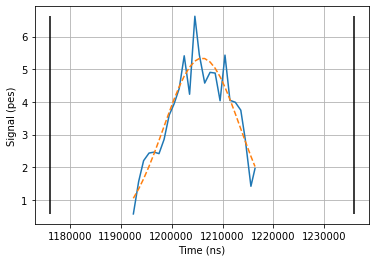

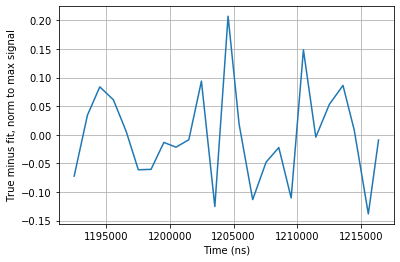

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8492164661511289
E  = 94.63248999861936


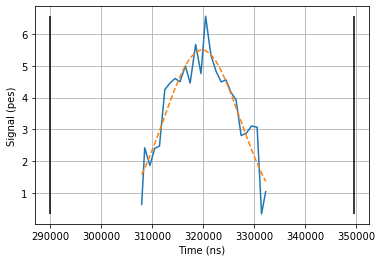

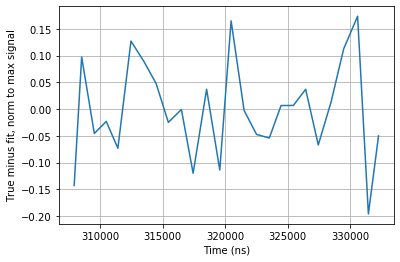

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8369303848911588
E  = 106.17149552579849


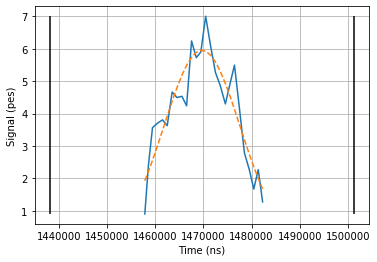

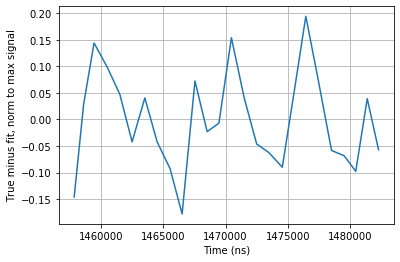

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8287900411750974
E  = 65.63181431591214


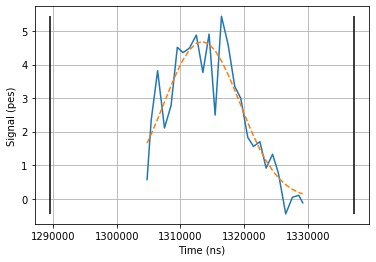

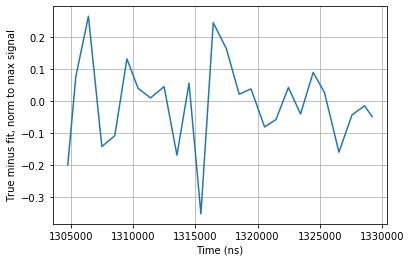

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


2000 , 2000
R2 = 0.8175960583101005
E  = 51.37307576663452


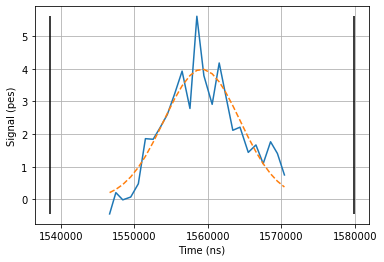

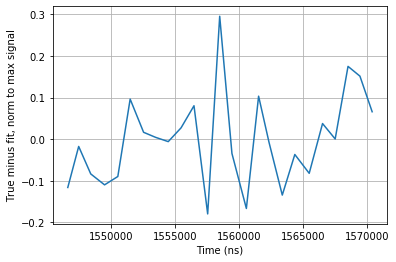

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


R2 = 0.8043415781805664
E  = 234.39869409276184


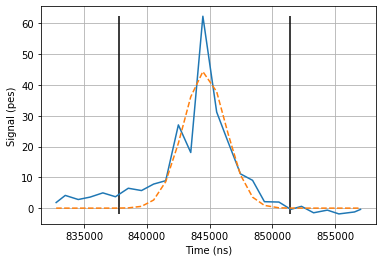

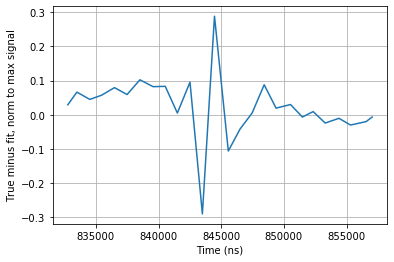

/Users/jmhaefner/miniconda/envs/IC-3.7-2020-06-16/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


3000 , 3000
4000 , 4000
5000 , 5000
6000 , 6000
7000 , 7000
8000 , 8000
9000 , 9000
10000 , 10000
11000 , 11000
12000 , 12000
13000 , 13000
14000 , 14000
15000 , 15000
16000 , 16000
17000 , 17000
18000 , 18000
19000 , 19000
20000 , 20000
21000 , 21000
22000 , 22000
23000 , 23000
24000 , 24000
25000 , 25000
26000 , 26000
27000 , 27000
28000 , 28000
29000 , 29000
30000 , 30000
31000 , 31000
32000 , 32000
33000 , 33000


In [50]:
# Check quality of Gaussian fit
# Plot the waveform
all_R2 = []

shown = 0
showmax = 20
cut = 0

for i_evt in range(len(events_window_Zgauss)):    
    if i_evt % 1000 == 0:
        print(i_evt, ',', len(all_R2))
        
    #i_evt = 0 # 7082 # 0

    try:

        xdata, ydata = events_times[i_evt], events_sumwf[i_evt]
        mean0, _ = weighted_avg_and_std(xdata, ydata)
        amp0 = np.max(ydata)

        # Get the stdev guess from the less edge dependent FWHM
        above_half_max = ydata > amp0 / 2
        start = np.argmax(above_half_max)
        end = len(above_half_max)-np.argmax(above_half_max[::-1])-1
        FWHM = xdata[end] - xdata[start]
        sigma0 = FWHM / (2*np.sqrt(2*np.log(2)))
        var0 = sigma0**2
        C0 = 0

        popt,  pcov  = curve_fit(gauss2, xdata, ydata, p0 = (amp0, mean0, var0))
        amp, mean, var = popt

        stdev = var**0.5
        Wgauss = stdev
        Zgauss = exp_dt(stdev/1000)

        fitcurve = gauss2(xdata, *popt)


        residuals = ydata - gauss2(xdata, *popt)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((ydata-np.mean(ydata))**2)
        r_squared = 1 - (ss_res / ss_tot)
        
    except:
        r_squared = 0
        
    all_R2.append(r_squared)
    
    if ((0.99-cut) < r_squared < (1-cut) and shown < showmax and cut < 1) or events_energy[i_evt] > 200000:
        
        shown += 1
        
        cut += 0.01
        print('R2 =', r_squared)
        print('E  =', events_energy[i_evt])
        plt.xlabel('Time (ns)')
        plt.ylabel('Signal (pes)')
        ymin = min(events_sumwf[i_evt])
        ymax = max(events_sumwf[i_evt])
        plt.vlines(mean - 4 * stdev, ymin, ymax)
        plt.vlines(mean + 4 * stdev, ymin, ymax)
        plt.plot(events_times[i_evt], events_sumwf[i_evt])
        plt.plot(events_times[i_evt], fitcurve, '--')
        plt.grid(True)
        plt.show()

        plt.xlabel('Time (ns)')
        plt.ylabel('True minus fit, norm to max signal')
        plt.plot(events_times[i_evt], (events_sumwf[i_evt] - fitcurve)/amp0)
        plt.grid(True)
        plt.show()
        
        

all_R2 = np.array(all_R2)

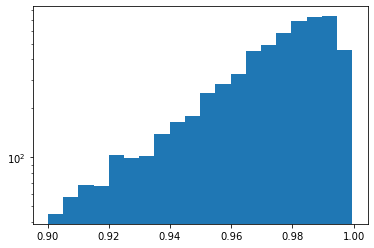

In [51]:
plt.hist(all_R2[Emask & (all_R2 > 0.9)], bins = 20)
plt.yscale('log')
plt.show()

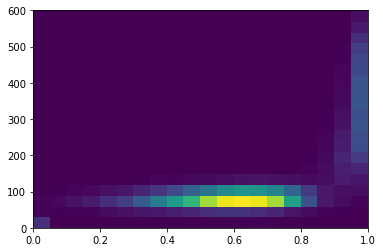

In [52]:
plt.hist2d(all_R2, events_energy, bins = 20, range=((0,1),(0, Ecut[1])))
plt.show()

In [53]:
Erange_guess = Ecut
r2mask = (all_R2 > 0.9)
Emask2 = (events_energy > Erange_guess[0]) & (events_energy < Erange_guess[1])
r2noisemask = r2mask & (events_energy > noise_bound)
selmask = r2mask & Emask2
print('R2 sel =', round(100*sum(r2mask)/len(r2mask),1))
print('Full sel =', round(100*sum(selmask)/len(selmask),1))

R2 sel = 22.6
Full sel = 18.0


In [54]:
len(events_energy[r2noisemask & (events_energy > Erange_guess[1])]) / len(events_energy[r2noisemask])

0.18847246651332702

In [55]:
for i in range(100):
    lower = (100. - i) / 2
    upper = lower + i
    print(i, '% =',lower,'to', upper,'=', np.percentile(events_energy[r2noisemask], lower), ',', np.percentile(events_energy[r2noisemask], upper))

0 % = 50.0 to 50.0 = 366.7118631647711 , 366.7118631647711
1 % = 49.5 to 50.5 = 364.43619377686184 , 368.6495734411339
2 % = 49.0 to 51.0 = 361.9664307124201 , 371.1983449325985
3 % = 48.5 to 51.5 = 359.2116959406266 , 373.87470300732105
4 % = 48.0 to 52.0 = 357.57116634713157 , 376.1517047851809
5 % = 47.5 to 52.5 = 355.42747938689917 , 378.4361828832785
6 % = 47.0 to 53.0 = 353.33887561455083 , 381.20059313565866
7 % = 46.5 to 53.5 = 350.992270933918 , 383.8248203739998
8 % = 46.0 to 54.0 = 348.3979079022135 , 386.23250585468486
9 % = 45.5 to 54.5 = 346.4137654568515 , 388.4609307949713
10 % = 45.0 to 55.0 = 343.3907260803896 , 390.51897182158837
11 % = 44.5 to 55.5 = 340.8362221759998 , 392.9712076639535
12 % = 44.0 to 56.0 = 338.57677254272244 , 395.2070297221767
13 % = 43.5 to 56.5 = 336.6142852898263 , 397.4404677885194
14 % = 43.0 to 57.0 = 333.982250804502 , 400.7743769711046
15 % = 42.5 to 57.5 = 331.81446298524696 , 402.8546186904253
16 % = 42.0 to 58.0 = 329.8387772994208 , 

GOT LSIGMA
GOT SIGMA
GOT RSIGMA


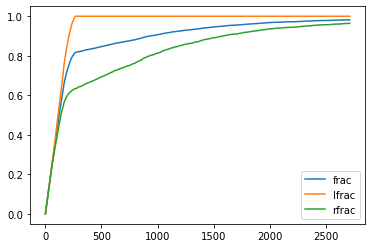

Med, lstdev, rstdev = 366.7118631647711 , 154.84864024476371 , 461.82927792297954
Fraction estimator = 176.58178273525687 vs std of 904.6420561667775
Four sigma sym energy range = -339.61526777625636 , 1073.0389941057986
Four sigma R/L energy range = -252.68269781428376 , 2214.0289748566893
Two sigma R/L energy range  = 57.01458267524367 , 1290.37041901073
R/L dble qrt energy range   = -11.896588978068678 , 655.4521605426296
Original "by eye" range     = 100 , 600
Selfmask signal frequency = 18.2


In [56]:
sigma_frac = 0.6827
std = np.std(events_energy[r2noisemask])
med = np.median(events_energy[r2noisemask])
ns = np.linspace(0, 3, 1000)
fracs = []
lfracs = []
rfracs = []

std_est = -1
lstd_est = -1
rstd_est = -1

left_total = np.sum(r2noisemask & (events_energy < med))
right_total = np.sum(r2noisemask & (events_energy >= med))

rrq = (np.percentile(events_energy[r2noisemask], 82) - med) # lradius, quartile. Go to double IQR
lrq = 2*(med - np.percentile(events_energy[r2noisemask], 8)) # rradius, quartile. Go to double IQR

for n in ns:
    # print()
    frac = np.sum( np.abs(events_energy[r2noisemask] - med)/std < n ) / len(events_energy[r2noisemask])
    lfrac = np.sum( np.abs(events_energy[r2noisemask & (events_energy < med)]-med)/std < n ) / left_total
    rfrac = np.sum( np.abs(events_energy[r2noisemask & (events_energy >= med)]-med)/std < n ) / right_total
    fracs.append(frac)
    lfracs.append(lfrac)
    rfracs.append(rfrac)
    if frac > sigma_frac and std_est == -1:
        std_est = n * std
        print('GOT SIGMA')
    if rfrac > sigma_frac and rstd_est == -1:
        rstd_est = n * std
        print('GOT RSIGMA')
    if lfrac > sigma_frac and lstd_est == -1:
        lstd_est = n * std
        print('GOT LSIGMA')

    # print('RFrac <', round(n,1), '=', rfrac)
    # print('LFrac <', round(n,1), '=', lfrac)
    # print('SFrac <', round(n,1), '=', frac)

plt.plot(ns * std, fracs, label = 'frac')
plt.plot(ns * std, lfracs, label = 'lfrac')
plt.plot(ns * std, rfracs, label = 'rfrac')
plt.legend()
plt.show()
print('Med, lstdev, rstdev =', med, ',', lstd_est, ',', rstd_est)
print('Fraction estimator =', std_est, 'vs std of', std)
print('Four sigma sym energy range =', med - 4*std_est, ',', med + 4*std_est)
print('Four sigma R/L energy range =', med - 4*lstd_est, ',', med + 4*rstd_est)
print('Two sigma R/L energy range  =', med - 2*lstd_est, ',', med + 2*rstd_est)
print('R/L dble qrt energy range   =', med - lrq, ',', med + rrq)
print('Original "by eye" range     =', Erange_guess[0], ',', Erange_guess[1])
erangeself = (med-lrq, med+rrq)
selfmask = r2noisemask & (events_energy > med-lrq) & (events_energy < med+rrq) & (all_Zgauss > 0)
print('Selfmask signal frequency =', round(100*np.sum(selfmask) / len(selfmask),1))

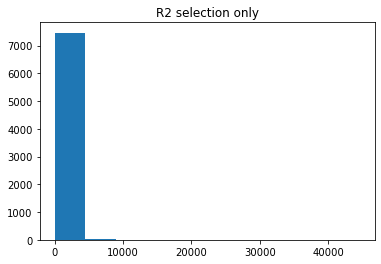

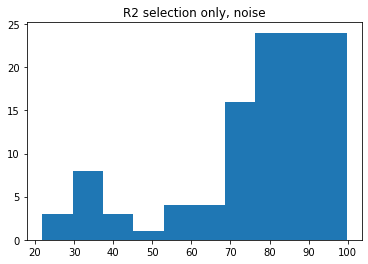

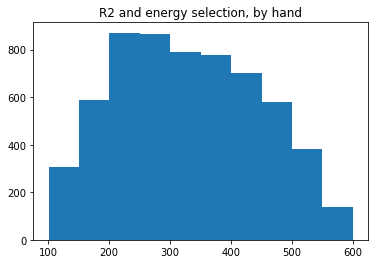

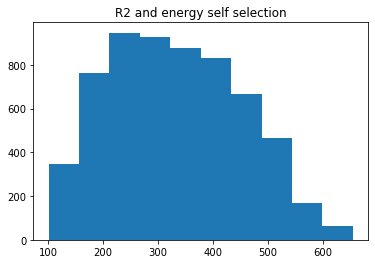

Fraction within energy cut = 0.7995201279658758


In [57]:
plt.hist(events_energy[r2mask])
plt.title('R2 selection only')
plt.show()

plt.hist(events_energy[r2mask & (events_energy < noise_bound)])
plt.title('R2 selection only, noise')
plt.show()

plt.hist(events_energy[selmask])
plt.title('R2 and energy selection, by hand')
plt.show()

plt.hist(events_energy[selfmask])
plt.title('R2 and energy self selection')
plt.show()

print('Fraction within energy cut =', len(events_energy[selmask]) / len(events_energy[r2mask]))

## Self cut spatial uniformity

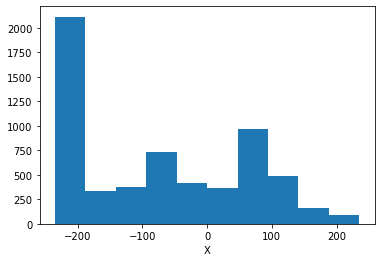

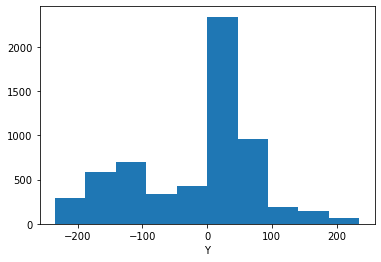

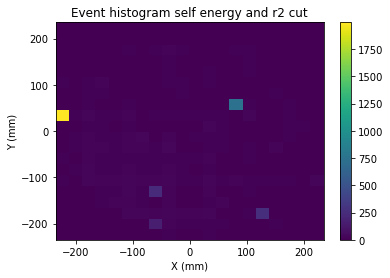

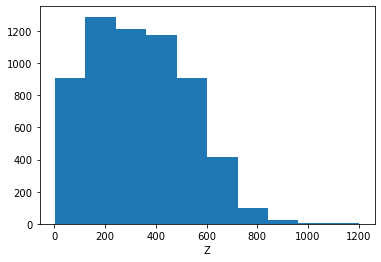

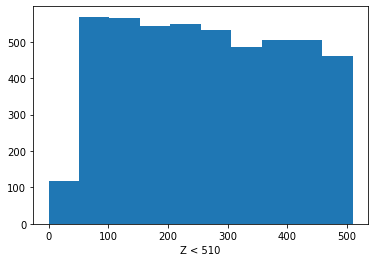

In [58]:
plt.hist(all_Xs[selfmask])
plt.xlabel('X')
plt.show()

plt.hist(all_Ys[selfmask])
plt.xlabel('Y')
plt.show()

hxy = plt.hist2d(all_Xs[selfmask], all_Ys[selfmask], bins = 20)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Event histogram self energy and r2 cut')
plt.colorbar(hxy[3])
plt.show()

plt.hist(all_Zgauss[selfmask])
plt.xlabel('Z')
plt.show()

plt.hist(all_Zgauss[selfmask], range=(0, 510))
plt.xlabel('Z < 510')
plt.show()

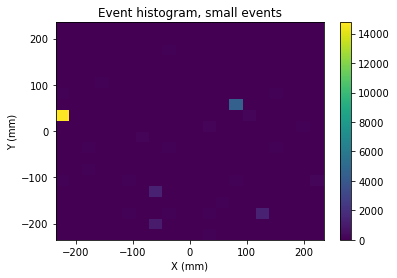

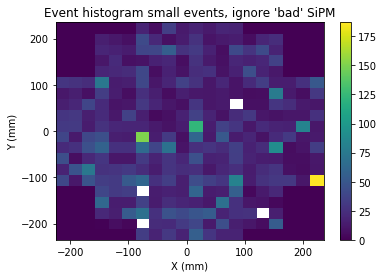

In [59]:
nobadsipm = (all_Xs != -235) & (all_Ys != 45)
smallevents = events_energy < 600

hxy = plt.hist2d(all_Xs[smallevents], all_Ys[smallevents], bins = 20)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Event histogram, small events')
plt.colorbar(hxy[3])
plt.show()

hxy = plt.hist2d(all_Xs[smallevents & nobadsipm], all_Ys[smallevents & nobadsipm], bins = 20, cmax = 1000)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Event histogram small events, ignore \'bad\' SiPM')
plt.colorbar(hxy[3])
plt.show()

## SiPM information

In [60]:
events_prewindow_sipm_summed = np.array([ np.sum(events_prewindow_sum_sipms[i]) for i in range(len(events_prewindow_sum_sipms)) ])

In [61]:
maskprepmt  = (events_prewindow_sums < 150) & (events_prewindow_sums > -150)
maskpresipm = (events_prewindow_sipm_summed < 270) & (events_prewindow_sipm_summed > 150)

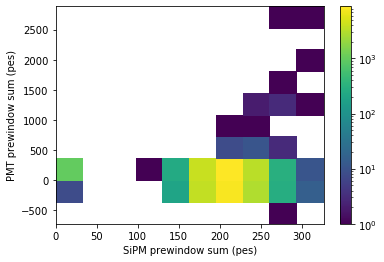

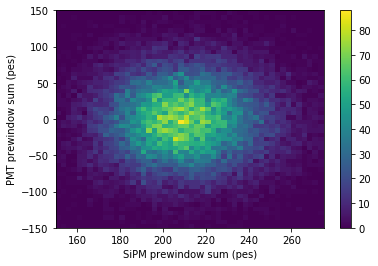

In [62]:
import matplotlib as mpl

hnoise = plt.hist2d(events_prewindow_sipm_summed, events_prewindow_sums, norm=mpl.colors.LogNorm())
plt.xlabel('SiPM prewindow sum (pes)')
plt.ylabel('PMT prewindow sum (pes)')
plt.colorbar(hnoise[3])
plt.show()

hnoise = plt.hist2d(events_prewindow_sipm_summed, events_prewindow_sums, bins = 50, range=((150,275),(-150,150)))
plt.xlabel('SiPM prewindow sum (pes)')
plt.ylabel('PMT prewindow sum (pes)')
plt.colorbar(hnoise[3])
plt.show()

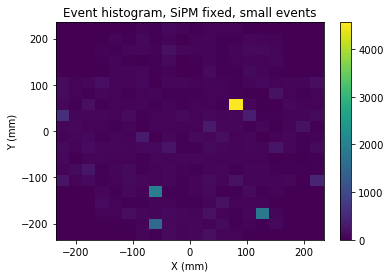

In [63]:
nobadsipm = (all_Xs != -235) & (all_Ys != 45)
smallevents = events_energy_subtracted < 600

hxy = plt.hist2d(events_X_sipm_subtracted[smallevents], events_Y_sipm_subtracted[smallevents], bins = 20)
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Event histogram, SiPM fixed, small events')
plt.colorbar(hxy[3])
plt.show()

In [64]:
event_signal_in_max_sipm = np.array([ np.max(e) for e in events_sum_sipms_subtracted ])

Mode x,y = 85.0 , 65.0


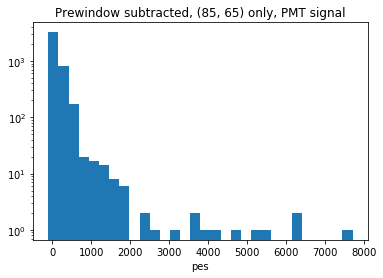

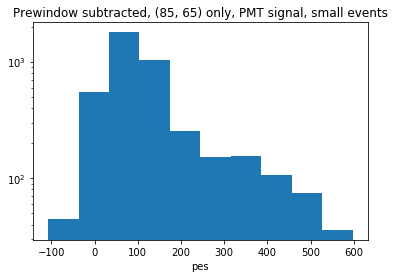

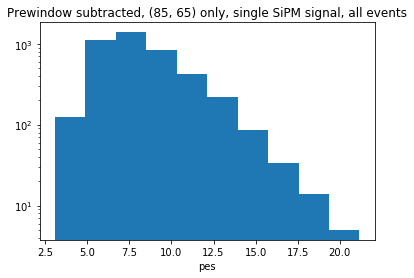

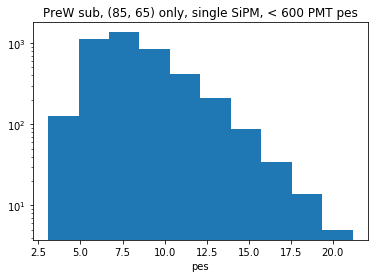

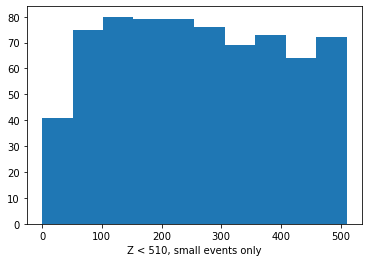

In [65]:
from scipy import stats
xmode = stats.mode(events_X_sipm_subtracted[smallevents]).mode[0]
ymode = stats.mode(events_Y_sipm_subtracted[smallevents]).mode[0]
print('Mode x,y =', xmode, ',', ymode)

high_sipm_cut = (events_X_sipm_subtracted == xmode) & (events_Y_sipm_subtracted == ymode)

plt.title('Prewindow subtracted, (85, 65) only, PMT signal')
plt.hist(events_energy_subtracted[high_sipm_cut], bins = 30)
plt.yscale('log')
plt.xlabel('pes')
plt.show()

plt.title('Prewindow subtracted, (85, 65) only, PMT signal, small events')
plt.hist(events_energy_subtracted[high_sipm_cut & smallevents], bins = 10)
plt.yscale('log')
plt.xlabel('pes')
plt.show()

plt.title('Prewindow subtracted, (85, 65) only, single SiPM signal, all events')
plt.hist(event_signal_in_max_sipm[high_sipm_cut], bins = 10)
plt.yscale('log')
plt.xlabel('pes')
plt.show()

plt.title('PreW sub, (85, 65) only, single SiPM, < 600 PMT pes')
plt.hist(event_signal_in_max_sipm[high_sipm_cut & smallevents], bins = 10)
plt.yscale('log')
plt.xlabel('pes')
plt.show()

plt.hist(all_Zgauss[high_sipm_cut & smallevents], range=(0, 510))
plt.xlabel('Z < 510, small events only')
plt.show()

In [66]:
max_signal_sipm = np.zeros(len(events_sum_sipms_subtracted[0]))
for i in range(len(max_signal_sipm)):
    all_signals_sipm = [ events_sum_sipms_subtracted[e][i] for e in range(len(events_sum_sipms_subtracted)) ]
    max_signal_sipm[i] = np.max(all_signals_sipm)

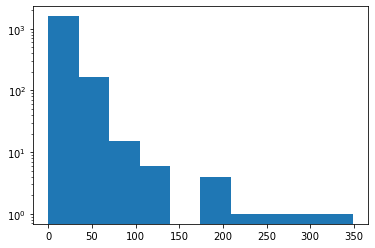

In [67]:
plt.hist(max_signal_sipm)
plt.yscale('log')
plt.show()

In [68]:
events_summed_sipms_subtracted = np.array([ np.sum(sipms) for sipms in events_sum_sipms_subtracted ])
events_summed_sipms = np.array([ np.sum(sipms) for sipms in events_sum_sipms ])

In [69]:
SiPMFullCut = (np.percentile(events_summed_sipms[selfmask & maskpresipm], 5), np.percentile(events_summed_sipms[selfmask & maskpresipm], 95))
SiPMSubCut  =  (np.percentile(events_summed_sipms_subtracted[selfmask & maskpresipm], 5), np.percentile(events_summed_sipms_subtracted[selfmask & maskpresipm], 95))

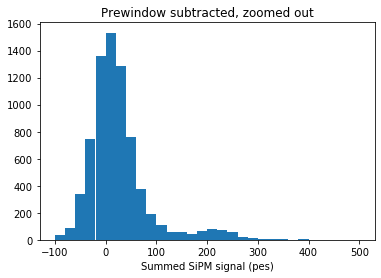

In [70]:
plt.title('Prewindow subtracted, zoomed out')
plt.hist(events_summed_sipms_subtracted[r2noisemask], range=(-100, 500), bins = 30)
#plt.yscale('log')
plt.xlabel('Summed SiPM signal (pes)')
plt.show()

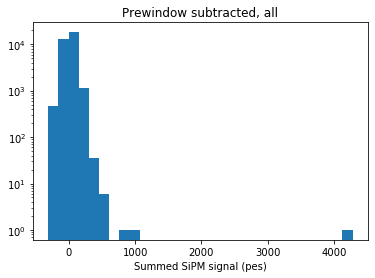

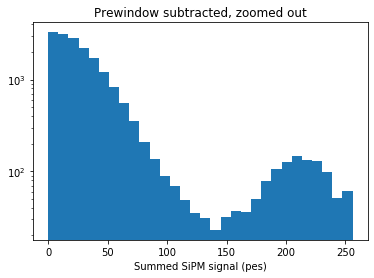

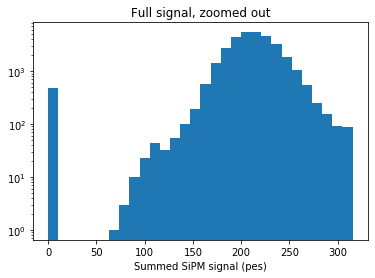

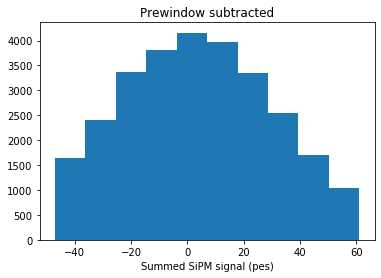

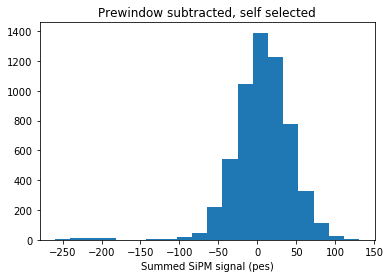

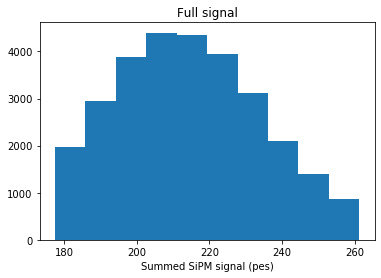

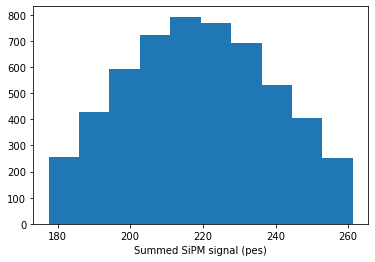

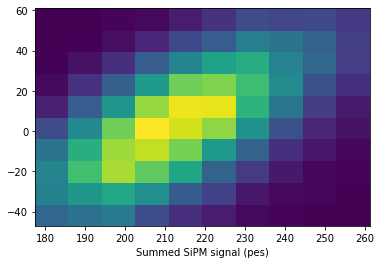

In [71]:
plt.title('Prewindow subtracted, all')
plt.hist(events_summed_sipms_subtracted, bins = 30)
plt.yscale('log')
plt.xlabel('Summed SiPM signal (pes)')
plt.show()

plt.title('Prewindow subtracted, zoomed out')
plt.hist(events_summed_sipms_subtracted, range=(0, np.percentile(events_summed_sipms_subtracted[maskpresipm], 99.9)), bins = 30)
plt.yscale('log')
plt.xlabel('Summed SiPM signal (pes)')
plt.show()

plt.title('Full signal, zoomed out')
plt.hist(events_summed_sipms, range=(0, np.percentile(events_summed_sipms, 99)), bins = 30)
plt.yscale('log')
plt.xlabel('Summed SiPM signal (pes)')
plt.show()

plt.title('Prewindow subtracted')
plt.hist(events_summed_sipms_subtracted, range=SiPMSubCut)
plt.xlabel('Summed SiPM signal (pes)')
plt.show()

plt.title('Prewindow subtracted, self selected')
plt.hist(events_summed_sipms_subtracted[selfmask & maskpresipm], bins = 20)
plt.xlabel('Summed SiPM signal (pes)')
plt.show()

plt.title('Full signal')
plt.hist(events_summed_sipms, range=SiPMFullCut)
plt.xlabel('Summed SiPM signal (pes)')
plt.show()

plt.hist(events_summed_sipms[selfmask], range=SiPMFullCut)
plt.xlabel('Summed SiPM signal (pes)')
plt.show()

plt.hist2d(events_summed_sipms, events_summed_sipms_subtracted, range=(SiPMFullCut,SiPMSubCut))
plt.xlabel('Summed SiPM signal (pes)')
plt.show()

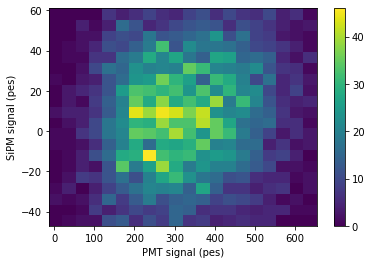

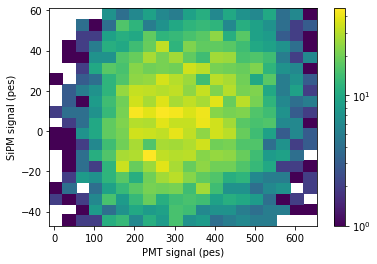

In [72]:
hsub = plt.hist2d(events_energy_subtracted[selfmask], events_summed_sipms_subtracted[selfmask], bins = 20, range=(erangeself,SiPMSubCut))
plt.colorbar(hsub[3])
plt.xlabel('PMT signal (pes)')
plt.ylabel('SiPM signal (pes)')
plt.show()

hsub = plt.hist2d(events_energy_subtracted[selfmask], events_summed_sipms_subtracted[selfmask], bins = 20, norm=mpl.colors.LogNorm(), range=(erangeself,SiPMSubCut))
plt.colorbar(hsub[3])
plt.xlabel('PMT signal (pes)')
plt.ylabel('SiPM signal (pes)')
plt.show()

In [73]:
presignal_sipm = np.zeros(len(events_prewindow_sum_sipms[0]))
for i in range(len(presignal_sipm)):
    all_signals_sipm = [ events_prewindow_sum_sipms[e][i] for e in range(len(events_prewindow_sum_sipms)) ]
    presignal_sipm[i] = np.max(all_signals_sipm)

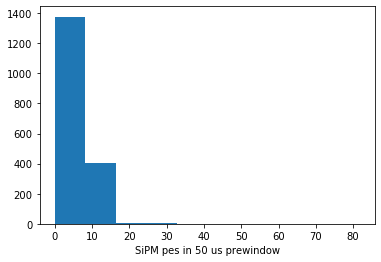

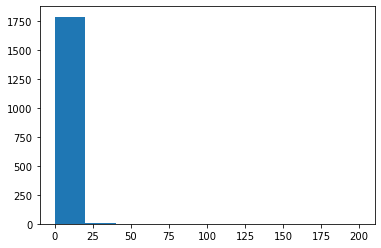

In [74]:
plt.hist(presignal_sipm)
plt.xlabel('SiPM pes in 50 us prewindow')
plt.show()

plt.hist(presignal_sipm, range=(0,200))
plt.show()

In [75]:
print('Total time =', time() - t0)
print('Total time, min =', (time() - t0)/60)

Total time = 4559.615622282028
Total time, min = 75.99360667069753


In [76]:
DataSiPM    = load_db.DataSiPM('new', run_number = int(runno))

In [77]:
len(DataSiPM.X)

1792